In [1]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Lambda, Layer, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
from tensorflow.keras.constraints import NonNeg
from tensorflow_addons.layers import InstanceNormalization
import time




def VGG16_model(input_shape=(32, 32, 3), classes=100, classifier_activation="softmax"):

    model = Sequential(name="VGG16")

    # Block 1
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same", name="block1_conv1", input_shape=input_shape))
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same", name="block1_conv2"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block1_pool"))
    model.add(Dropout(0.2))

    # Block 2
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same", name="block2_conv1"))
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same", name="block2_conv2"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block2_pool"))
    model.add(Dropout(0.2))

    # Block 3
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv1"))
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv2"))
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv3"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block3_pool"))
    model.add(Dropout(0.2))

    # Block 4
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv1"))
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv2"))
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv3"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block4_pool"))
    model.add(Dropout(0.2))

    # Flatten block
    model.add(Flatten(name="flatten"))

    # Añade la capa de activación al clasificador
    model.add(Dropout(0.4))
    model.add(Dense(classes, activation=classifier_activation, name="predictions"))

    return model

def VGG16_model_BN(input_shape=(32, 32, 3), classes=100, classifier_activation="softmax"):

    model = Sequential(name="VGG16_BN")

    # Block 1
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same", name="block1_conv1", input_shape=input_shape))
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same", name="block1_conv2"))
    model.add(BatchNormalization(name="block1_BN"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block1_pool"))
    model.add(Dropout(0.2))

    # Block 2
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same", name="block2_conv1"))
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same", name="block2_conv2"))
    model.add(BatchNormalization(name="block2_BN"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block2_pool"))
    model.add(Dropout(0.2))

    # Block 3
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv1"))
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv2"))
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv3"))
    model.add(BatchNormalization(name="block3_BN"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block3_pool"))
    model.add(Dropout(0.2))

    # Block 4
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv1"))
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv2"))
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv3"))
    model.add(BatchNormalization(name="block4_BN"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block4_pool"))
    model.add(Dropout(0.2))

    # Classification block
    model.add(Flatten(name="flatten"))

    # Añade la capa de activación al clasificador
    model.add(Dropout(0.2))
    model.add(Dense(classes, activation=classifier_activation, name="predictions"))

    return model


def VGG16_model_BN_v2(input_shape=(32, 32, 3), classes=100, classifier_activation="softmax"):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(16, (3, 3), activation="relu", padding="same", name="block1_conv1")(inputs)
    x = Conv2D(16, (3, 3), activation="relu", padding="same", name="block1_conv2")(x)
    x = BatchNormalization(name="block1_BN")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name="block1_pool")(x)
    x = Dropout(0.2)(x)

    # Block 2
    x = Conv2D(32, (3, 3), activation="relu", padding="same", name="block2_conv1")(x)
    x = Conv2D(32, (3, 3), activation="relu", padding="same", name="block2_conv2")(x)
    x = BatchNormalization(name="block2_BN")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name="block2_pool")(x)
    x = Dropout(0.2)(x)

    # Block 3
    x = Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv1")(x)
    x = Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv2")(x)
    x = Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv3")(x)
    x = BatchNormalization(name="block3_BN")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name="block3_pool")(x)
    x = Dropout(0.2)(x)

    # Block 4
    x = Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv1")(x)
    x = Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv2")(x)
    x = Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv3")(x)
    x = BatchNormalization(name="block4_BN")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name="block4_pool")(x)
    x = Dropout(0.2)(x)

    final = Flatten(name="flatten")(x)

    model_base = Model(inputs=inputs, outputs=final, name="VGG16_BN_v2")

    # Obtener la referencia a la capa BatchNormalization
    bn_layers = [layer for layer in model_base.layers if isinstance(layer, BatchNormalization)]

    # Usar una capa Lambda para agregar la media y la varianza a la salida del modelo
    def append_statistics(x, bn_layers):
      means=[]
      variances=[]
      for layer in bn_layers:

        mean = layer.weights[2]  # Media
        variance = layer.weights[3]  # Varianza

        # x es la salida de la capa Flatten
        mean_extended = tf.reshape(mean, (1, -1))
        variance_extended = tf.reshape(variance, (1, -1))

        # Repetir la media y la varianza para que coincidan con el batch size de x
        mean_repeated = tf.repeat(mean_extended, tf.shape(x)[0], axis=0)
        variance_repeated = tf.repeat(variance_extended, tf.shape(x)[0], axis=0)

        means.append(mean_repeated)
        variances.append(variance_repeated)

      means = tf.concat(means, axis=1)
      variances = tf.concat(variances, axis=1)

      # Concatenar x con la media y la varianza
      return tf.concat([x, means, variances], axis=1)

    concatenated = Lambda(lambda x: append_statistics(x, bn_layers),name="add_means_and_variances")(final)

    # Classification block
    drop = Dropout(0.2)(concatenated)
    predictions = Dense(classes, activation=classifier_activation, name="predictions")(drop)

    # Crear el nuevo modelo con la salida extendida
    model_extended = Model(inputs=inputs, outputs=predictions, name="VGG16_BN_v2")

    return model_extended

class GDN(Layer):
    def __init__(self,
                 filter_shape = (3,3),
                 **kwargs):

        self.filter_shape = filter_shape
        self.norm_conv = None  # Atributo para almacenar norm_conv

        super(GDN, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.beta = self.add_weight(name = 'beta',
                                    shape = (input_shape.as_list()[-1]),
                                    initializer = tf.keras.initializers.constant(0.001),
                                    trainable = True,
                                    constraint = lambda x: tf.clip_by_value(x, 1e-15, np.inf))

        self.alpha = self.add_weight(name = 'alpha',
                                     shape = (input_shape.as_list()[-1]),
                                     initializer = tf.keras.initializers.constant(1.0),
                                     trainable = False,
                                     constraint = NonNeg())

        self.epsilon = self.add_weight(name = 'epsilon',
                                     shape = (input_shape.as_list()[-1]),
                                     initializer = tf.keras.initializers.constant(1.0),
                                     trainable = False,
                                     constraint = NonNeg())

        self.gamma = self.add_weight(name = 'gamma',
                                     shape = (self.filter_shape[0], self.filter_shape[1], input_shape.as_list()[-1], input_shape.as_list()[-1]),
                                     initializer = tf.keras.initializers.Ones,
                                     trainable = True,
                                     constraint = NonNeg())


        super(GDN, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        norm_conv2 = tf.nn.convolution(tf.abs(x)**self.alpha,
                                      self.gamma,
                                      strides = (1, 1),
                                      padding = "SAME",
                                      data_format = "NHWC")

        norm_conv = self.beta + norm_conv2
        norm_conv = norm_conv**self.epsilon
        self.norm_conv = norm_conv  # Almacenar el valor de norm_conv
        return x / tf.abs(norm_conv)

    def compute_output_shape(self, input_shape):
        return (input_shape, self.output_dim)



def VGG16_model_GDN(input_shape=(32, 32, 3), classes=100, classifier_activation="softmax"):

    model = Sequential(name="VGG16_GDN")

    # Block 1
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same", name="block1_conv1", input_shape=input_shape))
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same", name="block1_conv2"))
    model.add(GDN(name="block1_GDN"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block1_pool"))
    model.add(Dropout(0.2))

    # Block 2
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same", name="block2_conv1"))
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same", name="block2_conv2"))
    model.add(GDN(name="block2_GDN"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block2_pool"))
    model.add(Dropout(0.2))

    # Block 3
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv1"))
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv2"))
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv3"))
    model.add(GDN(name="block3_GDN"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block3_pool"))
    model.add(Dropout(0.2))

    # Block 4
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv1"))
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv2"))
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv3"))
    model.add(GDN(name="block4_GDN"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block4_pool"))
    model.add(Dropout(0.2))

    # Classification block
    model.add(Flatten(name="flatten"))

    # Añade la capa de activación al clasificador
    model.add(Dropout(0.2))
    model.add(Dense(classes, activation=classifier_activation, name="predictions"))

    return model





def VGG16_model_GDN_v2(input_shape=(32, 32, 3), classes=100, classifier_activation="softmax"):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(16, (3, 3), activation="relu", padding="same", name="block1_conv1")(inputs)
    x = Conv2D(16, (3, 3), activation="relu", padding="same", name="block1_conv2")(x)
    x = GDN(name="block1_GDN")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name="block1_pool")(x)
    x = Dropout(0.2)(x)

    # Block 2
    x = Conv2D(32, (3, 3), activation="relu", padding="same", name="block2_conv1")(x)
    x = Conv2D(32, (3, 3), activation="relu", padding="same", name="block2_conv2")(x)
    x = GDN(name="block2_GDN")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name="block2_pool")(x)
    x = Dropout(0.2)(x)

    # Block 3
    x = Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv1")(x)
    x = Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv2")(x)
    x = Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv3")(x)
    x = GDN(name="block3_GDN")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name="block3_pool")(x)
    x = Dropout(0.2)(x)

    # Block 4
    x = Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv1")(x)
    x = Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv2")(x)
    x = Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv3")(x)
    x = GDN(name="block4_GDN")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name="block4_pool")(x)
    x = Dropout(0.2)(x)

    final = Flatten(name="flatten")(x)

    model_base = Model(inputs=inputs, outputs=final, name="VGG16_GDN_v2")

    # Obtener la referencia a la capa GDN
    gdn_layers = [layer for layer in model_base.layers if isinstance(layer, GDN)]

    # Usar una capa Lambda para agregar el denominador a la salida del modelo
    def append_statistics(x, gdn_layers):
      denoms = []
      for layer in gdn_layers:
        denom=layer.norm_conv
        denom=GlobalAveragePooling2D()(denom)
        denoms.append(denom)

      # Concatenar x con el denominador
      denoms = tf.concat(denoms, axis=1)
      return tf.concat([x, denoms], axis=1)

    concatenated = Lambda(lambda x: append_statistics(x, gdn_layers),name="add_denominator")(final)

    # Classification block
    drop = Dropout(0.2)(concatenated)
    predictions = Dense(classes, activation=classifier_activation, name="predictions")(drop)

    # Crear el nuevo modelo con la salida extendida
    model_extended = Model(inputs=inputs, outputs=predictions, name="VGG16_GDN_v2")

    return model_extended


def VGG16_model_IN(input_shape=(32, 32, 3), classes=100, classifier_activation="softmax"):

    model = Sequential(name="VGG16_IN")

    # Block 1
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same", name="block1_conv1", input_shape=input_shape))
    model.add(Conv2D(16, (3, 3), activation="relu", padding="same", name="block1_conv2"))
    model.add(InstanceNormalization(name="block1_IN"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block1_pool"))
    model.add(Dropout(0.2))

    # Block 2
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same", name="block2_conv1"))
    model.add(Conv2D(32, (3, 3), activation="relu", padding="same", name="block2_conv2"))
    model.add(InstanceNormalization(name="block2_IN"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block2_pool"))
    model.add(Dropout(0.2))

    # Block 3
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv1"))
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv2"))
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv3"))
    model.add(InstanceNormalization(name="block3_IN"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block3_pool"))
    model.add(Dropout(0.2))

    # Block 4
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv1"))
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv2"))
    model.add(Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv3"))
    model.add(InstanceNormalization(name="block4_IN"))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), name="block4_pool"))
    model.add(Dropout(0.2))

    # Flatten block
    model.add(Flatten(name="flatten"))

    # Añade la capa de activación al clasificador
    model.add(Dropout(0.2))
    model.add(Dense(classes, activation=classifier_activation, name="predictions"))

    return model


class ModifiedInstanceNormalization(InstanceNormalization):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.means_list = None
        self.variances_list = None

    def _apply_normalization(self, reshaped_inputs, input_shape):

        group_shape = tf.keras.backend.int_shape(reshaped_inputs)
        group_reduction_axes = list(range(1, len(group_shape)))
        is_instance_norm = (input_shape[self.axis] // self.groups) == 1
        if not is_instance_norm:
            axis = -2 if self.axis == -1 else self.axis - 1
        else:
            axis = -1 if self.axis == -1 else self.axis - 1
        group_reduction_axes.pop(axis)

        mean, variance = tf.nn.moments(
            reshaped_inputs, group_reduction_axes, keepdims=True
        )
        self.means_list=mean
        self.variances_list=variance

        gamma, beta = self._get_reshaped_weights(input_shape)
        normalized_inputs = tf.nn.batch_normalization(
            reshaped_inputs,
            mean=mean,
            variance=variance,
            scale=gamma,
            offset=beta,
            variance_epsilon=self.epsilon,
        )
        return normalized_inputs

    def call(self, inputs):
        input_shape = tf.keras.backend.int_shape(inputs)
        tensor_input_shape = tf.shape(inputs)

        reshaped_inputs, group_shape = self._reshape_into_groups(
            inputs, input_shape, tensor_input_shape
        )

        normalized_inputs = self._apply_normalization(reshaped_inputs, input_shape)

        is_instance_norm = (input_shape[self.axis] // self.groups) == 1
        if not is_instance_norm:
            outputs = tf.reshape(normalized_inputs, tensor_input_shape)
        else:
            outputs = normalized_inputs

        return outputs




def VGG16_model_IN_v2(input_shape=(32, 32, 3), classes=100, classifier_activation="softmax"):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(16, (3, 3), activation="relu", padding="same", name="block1_conv1")(inputs)
    x = Conv2D(16, (3, 3), activation="relu", padding="same", name="block1_conv2")(x)
    x = ModifiedInstanceNormalization(name="block1_IN")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name="block1_pool")(x)
    x = Dropout(0.2)(x)

    # Block 2
    x = Conv2D(32, (3, 3), activation="relu", padding="same", name="block2_conv1")(x)
    x = Conv2D(32, (3, 3), activation="relu", padding="same", name="block2_conv2")(x)
    x = ModifiedInstanceNormalization(name="block2_IN")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name="block2_pool")(x)
    x = Dropout(0.2)(x)

    # Block 3
    x = Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv1")(x)
    x = Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv2")(x)
    x = Conv2D(64, (3, 3), activation="relu", padding="same", name="block3_conv3")(x)
    x = ModifiedInstanceNormalization(name="block3_IN")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name="block3_pool")(x)
    x = Dropout(0.2)(x)

    # Block 4
    x = Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv1")(x)
    x = Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv2")(x)
    x = Conv2D(128, (3, 3), activation="relu", padding="same", name="block4_conv3")(x)
    x = ModifiedInstanceNormalization(name="block4_IN")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name="block4_pool")(x)
    x = Dropout(0.2)(x)

    final = Flatten(name="flatten")(x)

    model_base = Model(inputs=inputs, outputs=final, name="VGG16_IN_v2")

    # Obtener la referencia a la capa ModifiedInstanceNormalization
    in_layers = [layer for layer in model_base.layers if isinstance(layer, ModifiedInstanceNormalization)]

    # Usar una capa Lambda para agregar la media y la varianza a la salida del modelo
    def append_statistics(x, in_layers):
        means = []
        variances = []
        for layer in in_layers:
            mean = layer.means_list
            variance = layer.variances_list

            # Obtener la forma dinámica del tensor
            shape = tf.shape(mean)
            mean_extended = tf.reshape(mean, [-1, shape[-1]])
            variance_extended = tf.reshape(variance, [-1, shape[-1]])

            means.append(mean_extended)
            variances.append(variance_extended)

        means = tf.concat(means, axis=1)
        variances = tf.concat(variances, axis=1)
        return tf.concat([x, means, variances], axis=1)

    concatenated = Lambda(lambda x: append_statistics(x, in_layers), name="add_means_and_variances")(final)

    drop = Dropout(0.2)(concatenated)
    predictions = Dense(classes, activation=classifier_activation, name="predictions")(drop)

    # Crear el nuevo modelo con la salida extendida
    model_extended = Model(inputs=inputs, outputs=predictions, name="VGG16_IN_v2")

    return model_extended

def PerceptNet(input_shape=(32, 32, 3), classes=100, classifier_activation="softmax"):

    model = Sequential(name="PerceptNet")
    model.add(Input(shape=input_shape))
    model.add(Conv2D(kernel_size=(1, 1), filters=3, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(kernel_size=(5, 5), filters=6, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(kernel_size=(5, 5), filters=128, padding='same'))
    model.add(Dropout(0.2))

    # Añadimos un global pooling para reducir la dimensionalidad, una capa flatten y una capa densa
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(classes, activation=classifier_activation))

    return model

def PerceptNet_BN(input_shape=(32, 32, 3), classes=100, classifier_activation="softmax"):

    model = Sequential(name="PerceptNet_BN")
    model.add(Input(shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(kernel_size=(1, 1), filters=3, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(kernel_size=(5, 5), filters=6, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(kernel_size=(5, 5), filters=128, padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Añadimos un global pooling para reducir la dimensionalidad, una capa flatten y una capa densa
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(classes, activation=classifier_activation))

    return model


def PerceptNet_IN(input_shape=(32, 32, 3), classes=100, classifier_activation="softmax"):

    model = Sequential(name="PerceptNet_IN")
    model.add(Input(shape=input_shape))
    model.add(InstanceNormalization())
    model.add(Conv2D(kernel_size=(1, 1), filters=3, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(InstanceNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(kernel_size=(5, 5), filters=6, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(InstanceNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(kernel_size=(5, 5), filters=128, padding='same'))
    model.add(InstanceNormalization())
    model.add(Dropout(0.2))

    # Añadimos un global pooling para reducir la dimensionalidad, una capa flatten y una capa densa
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(classes, activation=classifier_activation))

    return model

def PerceptNet_GDN(input_shape=(32, 32, 3), classes=100, classifier_activation="softmax"):

    model = Sequential(name="PerceptNet_GDN")
    model.add(Input(shape=input_shape))
    model.add(GDN(filter_shape=(1, 1)))
    model.add(Conv2D(kernel_size=(1, 1), filters=3, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(GDN(filter_shape=(1, 1)))
    model.add(Dropout(0.2))
    model.add(Conv2D(kernel_size=(5, 5), filters=6, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(GDN(filter_shape=(1, 1)))
    model.add(Dropout(0.2))
    model.add(Conv2D(kernel_size=(5, 5), filters=128, padding='same'))
    model.add(GDN(filter_shape=(1, 1)))
    model.add(Dropout(0.2))

    # Añadimos un global pooling para reducir la dimensionalidad, una capa flatten y una capa densa
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(classes, activation=classifier_activation))

    return model

def PerceptNet_GDN_v2(input_shape=(32, 32, 3), classes=100, classifier_activation="softmax"):
    inputs = Input(shape=input_shape)
    x = GDN(name="GDN1")(inputs)
    x = Conv2D(kernel_size=(1, 1), filters=3, padding='same', name="conv1")(x)
    x = MaxPooling2D(pool_size=(2, 2), name="MaxPool1")(x)
    x = GDN(name="GDN2")(x)
    x = Dropout(0.2)(x)
    x = Conv2D(kernel_size=(5, 5), filters=6, padding='same', name="conv2")(x)
    x = MaxPooling2D(pool_size=(2, 2), name="MaxPool2")(x)
    x = GDN(name="GDN3")(x)
    x = Dropout(0.2)(x)
    x = Conv2D(kernel_size=(5, 5), filters=128, padding='same', name="conv3")(x)
    x = GDN(name="GDN4")(x)
    x = Dropout(0.2)(x)
    x = GlobalAveragePooling2D(name="GlobAv")(x)
    final = Flatten(name="flatten")(x)

    model_base = Model(inputs=inputs, outputs=final, name="PerceptNet_GDN_v2")

    # Obtener la referencia a la capa GDN
    gdn_layers = [layer for layer in model_base.layers if isinstance(layer, GDN)]

    # Usar una capa Lambda para agregar el denominador a la salida del modelo
    def append_statistics(x, gdn_layers):
      denoms = []
      for layer in gdn_layers:
        denom=layer.norm_conv
        denom=GlobalAveragePooling2D()(denom)
        denoms.append(denom)

      # Concatenar x con el denominador
      denoms = tf.concat(denoms, axis=1)
      return tf.concat([x, denoms], axis=1)

    concatenated = Lambda(lambda x: append_statistics(x, gdn_layers),name="add_denominator")(final)

    drop = Dropout(0.2)(concatenated)
    predictions = Dense(classes, activation=classifier_activation, name="predictions")(drop)

    # Crear el nuevo modelo con la salida extendida
    model_extended = Model(inputs=inputs, outputs=predictions, name="PerceptNet_GDN_v2")

    return model_extended


def PerceptNet_BN_v2(input_shape=(32, 32, 3), classes=100, classifier_activation="softmax"):
    inputs = Input(shape=input_shape)
    x = BatchNormalization(name="BN1")(inputs)
    x = Conv2D(kernel_size=(1, 1), filters=3, padding='same', name="conv1")(x)
    x = MaxPooling2D(pool_size=(2, 2), name="MaxPool1")(x)
    x = BatchNormalization(name="BN2")(x)
    x = Dropout(0.2)(x)
    x = Conv2D(kernel_size=(5, 5), filters=6, padding='same', name="conv2")(x)
    x = MaxPooling2D(pool_size=(2, 2), name="MaxPool2")(x)
    x = BatchNormalization(name="BN3")(x)
    x = Dropout(0.2)(x)
    x = Conv2D(kernel_size=(5, 5), filters=128, padding='same', name="conv3")(x)
    x = BatchNormalization(name="BN4")(x)
    x = Dropout(0.2)(x)
    x = GlobalAveragePooling2D(name="GlobAv")(x)
    final = Flatten(name="flatten")(x)

    model_base = Model(inputs=inputs, outputs=final, name="PerceptNet_BN_v2")

    # Obtener la referencia a la capa BatchNormalization
    bn_layers = [layer for layer in model_base.layers if isinstance(layer, BatchNormalization)]

    # Usar una capa Lambda para agregar la media y la varianza a la salida del modelo
    def append_statistics(x, bn_layers):
      means=[]
      variances=[]
      for layer in bn_layers:

        mean = layer.weights[2]  # Media
        variance = layer.weights[3]  # Varianza

        # x es la salida de la capa Flatten
        mean_extended = tf.reshape(mean, (1, -1))
        variance_extended = tf.reshape(variance, (1, -1))

        # Repetir la media y la varianza para que coincidan con el batch size de x
        mean_repeated = tf.repeat(mean_extended, tf.shape(x)[0], axis=0)
        variance_repeated = tf.repeat(variance_extended, tf.shape(x)[0], axis=0)

        means.append(mean_repeated)
        variances.append(variance_repeated)

      means = tf.concat(means, axis=1)
      variances = tf.concat(variances, axis=1)

      # Concatenar x con la media y la varianza
      return tf.concat([x, means, variances], axis=1)

    concatenated = Lambda(lambda x: append_statistics(x, bn_layers),name="add_means_and_variances")(final)

    drop = Dropout(0.2)(concatenated)
    predictions = Dense(classes, activation=classifier_activation, name="predictions")(drop)

    # Crear el nuevo modelo con la salida extendida
    model_extended = Model(inputs=inputs, outputs=predictions, name="PerceptNet_BN_v2")

    return model_extended


def PerceptNet_IN_v2(input_shape=(32, 32, 3), classes=100, classifier_activation="softmax"):
    inputs = Input(shape=input_shape)
    x = ModifiedInstanceNormalization(name="IN1")(inputs)
    x = Conv2D(kernel_size=(1, 1), filters=3, padding='same', name="conv1")(x)
    x = MaxPooling2D(pool_size=(2, 2), name="MaxPool1")(x)
    x = ModifiedInstanceNormalization(name="IN2")(x)
    x = Dropout(0.2)(x)
    x = Conv2D(kernel_size=(5, 5), filters=6, padding='same', name="conv2")(x)
    x = MaxPooling2D(pool_size=(2, 2), name="MaxPool2")(x)
    x = ModifiedInstanceNormalization(name="IN3")(x)
    x = Dropout(0.2)(x)
    x = Conv2D(kernel_size=(5, 5), filters=128, padding='same', name="conv3")(x)
    x = ModifiedInstanceNormalization(name="IN4")(x)
    x = Dropout(0.2)(x)
    x = GlobalAveragePooling2D(name="GlobAv")(x)
    final = Flatten(name="flatten")(x)

    model_base = Model(inputs=inputs, outputs=final, name="PerceptNet_IN_v2")

    # Obtener la referencia a la capa ModifiedInstanceNormalization
    in_layers = [layer for layer in model_base.layers if isinstance(layer, ModifiedInstanceNormalization)]
    # Usar una capa Lambda para agregar la media y la varianza a la salida del modelo
    def append_statistics(x, in_layers):
        means = []
        variances = []
        for layer in in_layers:
            mean = layer.means_list
            variance = layer.variances_list

            # Obtener la forma dinámica del tensor
            shape = tf.shape(mean)
            mean_extended = tf.reshape(mean, [-1, shape[-1]])
            variance_extended = tf.reshape(variance, [-1, shape[-1]])

            means.append(mean_extended)
            variances.append(variance_extended)

        means = tf.concat(means, axis=1)
        variances = tf.concat(variances, axis=1)
        return tf.concat([x, means, variances], axis=1)

    concatenated = Lambda(lambda x: append_statistics(x, in_layers), name="add_means_and_variances")(final)

    drop = Dropout(0.2)(concatenated)
    predictions = Dense(classes, activation=classifier_activation)(drop)

    # Crear el nuevo modelo con la salida extendida
    model_extended = Model(inputs=inputs, outputs=predictions, name="PerceptNet_IN_v2")

    return model_extended


c:\Users\Usuario\miniconda3\envs\tf_gpu\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Usuario\miniconda3\envs\tf_gpu\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issu

# *PROPUESTA*


Comprobar si en redes neuronales la información de las capas de normalización se puede reusar para mejorar los resultados en problemas de clasificación.  Se van a probar 2 modelos y 2 tipos de normalización.

Modelos:
- VGG16
- PerceptNET

Versiones:
- Original
- Con BN
- Con BN usando la media y la varianza en la capa densa final.
- Con GDN
- Con GDN usando las medias y las desviaciones del denominador en la capa densa final.

AHORA TIENES QUE...
- Rellenar el anteproyecto y enviárnoslo.
- Buscar un código donde se haga la red VGG16 y se entrene para clasificación en CIFAR100.
- Cuando lo tengas y lo consigas entrenar hay que meterle capas de BatchNormalization antes de las capas de pooling y entrenarlo, comparas con y sin BatchNormalization.

INFORMACIÓN

**Cosas para leer:**
- TFG de Nuria Alabau donde se explica VGG16, y se hace un modelo donde se cogen las salidas de capas intermedias para mejorar la clasificación (Figura 3.14). En tu caso en lugar de coger las salidas de esas capas cogerías los parámetros de las normalizaciones:

https://www.uv.es/lapeva/Thesis/TFM_2023_Nuria_Alabau_compr.pdf

- TFG de Pablo donde se explica la GDN, y se usa para segmentación:

https://www.uv.es/lapeva/Thesis/TFM_2022_Pablo_Hernandez.pdf

- TFG de Jorge Vila donde se explica PerceptNet y se usa para clasificación, también explica la GDN y la usa en el modelo:

https://www.uv.es/lapeva/Thesis/TFM_2023_MCD_Jorge_Vila_compr.pdf

**Código de la capa GDN donde se usa para hacer modelos:**

https://drive.google.com/file/d/1H0hAcB_O_TP7bBMhb0FOOp01P4nyKmKT/view?usp=share_link

# Librerías


In [2]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

import tensorflow as tf

import visualkeras

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

import os
import re

import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# from models import *
# from models import VGG16_model, VGG16_model_BN, VGG16_model_BN_v2, VGG16_model_GDN, VGG16_model_GDN_v2, VGG16_model_IN, VGG16_model_IN_v2
import json
from keras.callbacks import ModelCheckpoint


# Cifar 100

In [3]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Normalización de los datos
x_train=x_train/255
x_test=x_test/255
x_val=x_val/255


# One hot encoding
y_train = to_categorical(y_train, num_classes = 100)
y_test = to_categorical(y_test, num_classes = 100)
y_val = to_categorical(y_val, num_classes = 100)

In [4]:
epochs=500
batch_size=64

In [5]:
def extraer_epocas(nombre="VGG16_cifar100", path="./models/", epochs=100, mostrar=True):
    """
    Extrae la última época de entrenamiento de un modelo específico, el nombre del último archivo de entrenamiento,
    y calcula la época de inicio para el próximo entrenamiento.

    Args:
        nombre (str): Nombre base del modelo para el cual se extraerán las épocas. El nombre debe ser parte del nombre de archivo de los pesos guardados.
        path (str): Ruta al directorio donde se encuentran guardados los pesos del modelo.
        epochs (int): Número de épocas adicionales para entrenar el modelo.

    Returns:
        tuple: Contiene la última época de entrenamiento registrada, la nueva época hasta la cual se planea entrenar el modelo,
               y el nombre del último archivo de entrenamiento del modelo.

    Esta función es útil para continuar el entrenamiento de un modelo desde el punto donde se dejó anteriormente,
    permitiendo así un entrenamiento incremental en vez de comenzar desde cero cada vez.
    """


    ultimo_archivo = None  # Inicializa la variable para almacenar el nombre del último archivo de entrenamiento.

    # Verifica si el directorio especificado en 'path' existe.
    if os.path.exists(path):
        # Define un patrón regular para buscar archivos que coincidan con el nombre del modelo y su numeración de época.
        patron = re.compile(nombre + r'_epoch(\d+)-(\d+)\.h5')
        archivos = [(archivo, int(patron.search(archivo).group(2))) for archivo in os.listdir(path) if patron.search(archivo)]

        # Si se encuentran archivos que coincidan, determina la última época guardada y el archivo correspondiente.
        if archivos:
            archivos.sort(key=lambda x: x[1])  # Ordena los archivos por el número de la última época.
            ultimo_archivo = archivos[-1][0]  # Obtiene el nombre del archivo de la última época.
            ultimo_archivo = os.path.join(path, ultimo_archivo)
            ultima_epoca = archivos[-1][1]  # Obtiene el número de la última época.
        else:
            ultima_epoca = 0
    else:
        ultima_epoca = 0

    nueva_epoca = ultima_epoca + epochs
    if mostrar:
      print(f"El nuevo entrenamiento se hará desde la época {ultima_epoca} hasta la época {nueva_epoca} para {nombre}, usando el archivo {ultimo_archivo}.")

    return ultima_epoca, nueva_epoca, ultimo_archivo

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger


def model_checkpoint_callback(name="", directory="checkpoints"):
    """
    Crea callbacks ModelCheckpoint y CSVLogger.

    Args:
    name (str): El nombre del modelo.
    directory (str): El directorio donde se guardarán los checkpoints.

    Returns:
    list: Lista de callbacks configurados.
    """
    # Crear el filepath para ModelCheckpoint
    checkpoint_filepath = f"{directory}/{name}_checkpoint.h5"
    
    # Crear el callback ModelCheckpoint
    model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )
    
    # Crear el callback CSVLogger
    csv_logger_callback = CSVLogger(f"{directory}/{name}_training_log.csv", separator=',', append=False)
    
    return [model_checkpoint_callback, csv_logger_callback]

# Modelo VGG16

In [15]:
from tensorflow.keras.metrics import Precision, Recall, AUC
vgg16=VGG16_model()
optimizer_adam=tf.keras.optimizers.Adam(0.0005)
vgg16.compile(loss='categorical_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])
vgg16.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 16)        448       
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 16)        2320      
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 16)        0         
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 32)        4640      
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 32)        9248      
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 32)          0     

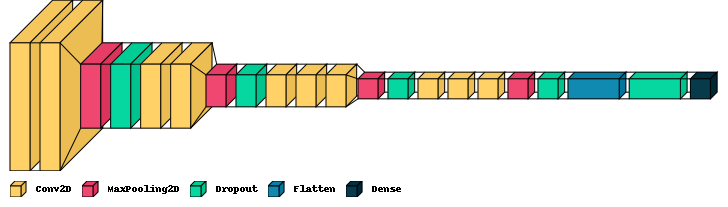

In [16]:
visualkeras.layered_view(vgg16, legend=True)

In [17]:
ultima_epoca, nueva_epoca, ultimo_archivo=extraer_epocas(nombre="VGG16_cifar100", epochs=epochs)
if ultimo_archivo:
#     #load weights
    vgg16.load_weights(ultimo_archivo)

start_time = time.time()
vgg16_hist=vgg16.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[model_checkpoint_callback(name="VGG16_cifar100")])
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time} segundos.")

El nuevo entrenamiento se hará desde la época 0 hasta la época 500 para VGG16_cifar100, usando el archivo None.
Epoch 1/500
625/625 [==============================] - 4s 6ms/step - loss: 4.4837 - accuracy: 0.0183 - val_loss: 4.2225 - val_accuracy: 0.0397
Epoch 2/500
625/625 [==============================] - 4s 6ms/step - loss: 4.1011 - accuracy: 0.0574 - val_loss: 3.8738 - val_accuracy: 0.0941
Epoch 3/500
625/625 [==============================] - 4s 6ms/step - loss: 3.8585 - accuracy: 0.0962 - val_loss: 3.6655 - val_accuracy: 0.1239
Epoch 4/500
625/625 [==============================] - 4s 6ms/step - loss: 3.6802 - accuracy: 0.1283 - val_loss: 3.4912 - val_accuracy: 0.1585
Epoch 5/500
625/625 [==============================] - 4s 7ms/step - loss: 3.5252 - accuracy: 0.1555 - val_loss: 3.3494 - val_accuracy: 0.1881
Epoch 6/500
625/625 [==============================] - 4s 6ms/step - loss: 3.3913 - accuracy: 0.1794 - val_loss: 3.2286 - val_accuracy: 0.2126
Epoch 7/500
625/625 [=========

In [18]:
# Guardar los pesos
vgg16.save_weights(f'./models/VGG16_cifar100_epoch{ultima_epoca}-{nueva_epoca}.h5')
# Guardar history
with open(f'./models/VGG16_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.pkl', 'wb') as f:
    pickle.dump(vgg16_hist.history, f)

with open(f'./models/VGG16_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.json', 'w') as f:
    json.dump(vgg16_hist.history, f)


Text(0.5, 1.0, 'accuracy')

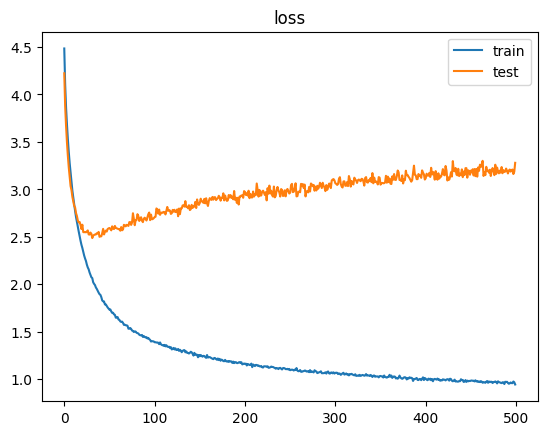

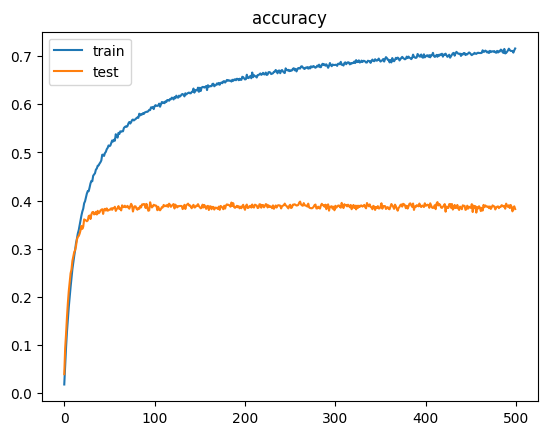

In [19]:
plt.plot(vgg16_hist.history['loss'])
plt.plot(vgg16_hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss.png",dpi=300,format="png")
plt.figure()
plt.plot(vgg16_hist.history['accuracy'])
plt.plot(vgg16_hist.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
# plt.savefig("accuracy.png",dpi=300,format="png")

# VGG16 + BatchNormalization


In [20]:
vgg16_bn=VGG16_model_BN()
vgg16_bn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

vgg16_bn.summary()


Model: "VGG16_BN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 16)        448       
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 16)        2320      
                                                                 
 block1_BN (BatchNormalizati  (None, 32, 32, 16)       64        
 on)                                                             
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 16)        0         
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 32)        4640      
                                                          

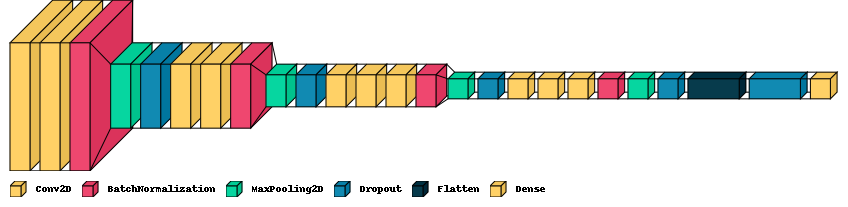

In [21]:
visualkeras.layered_view(vgg16_bn, legend=True)

In [23]:
ultima_epoca, nueva_epoca, ultimo_archivo=extraer_epocas(nombre="VGG16_cifar100_BN", epochs=epochs)
if ultimo_archivo:
    #load weights
    vgg16_bn.load_weights(ultimo_archivo)

start_time = time.time()
vgg16_bn_hist=vgg16_bn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[model_checkpoint_callback(name="VGG16_cifar100_BN")])
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time} segundos.")

El nuevo entrenamiento se hará desde la época 0 hasta la época 500 para VGG16_cifar100_BN, usando el archivo None.
Epoch 1/500
625/625 [==============================] - 4s 6ms/step - loss: 0.9050 - accuracy: 0.7229 - val_loss: 2.3278 - val_accuracy: 0.4793
Epoch 2/500
625/625 [==============================] - 4s 6ms/step - loss: 0.9141 - accuracy: 0.7204 - val_loss: 2.3383 - val_accuracy: 0.4699
Epoch 3/500
625/625 [==============================] - 5s 7ms/step - loss: 0.8783 - accuracy: 0.7286 - val_loss: 2.4094 - val_accuracy: 0.4707
Epoch 4/500
625/625 [==============================] - 4s 7ms/step - loss: 0.8653 - accuracy: 0.7332 - val_loss: 2.4897 - val_accuracy: 0.4628
Epoch 5/500
625/625 [==============================] - 4s 7ms/step - loss: 0.8563 - accuracy: 0.7351 - val_loss: 2.4233 - val_accuracy: 0.4708
Epoch 6/500
625/625 [==============================] - 4s 7ms/step - loss: 0.8469 - accuracy: 0.7390 - val_loss: 2.6213 - val_accuracy: 0.4511
Epoch 7/500
625/625 [======

In [24]:
# Guardar los pesos
vgg16_bn.save_weights(f'./models/VGG16_cifar100_BN_epoch{ultima_epoca}-{nueva_epoca}.h5')

# Guardar history
with open(f'./models/VGG16_cifar100_BN_epoch{ultima_epoca}-{nueva_epoca}_hist.pkl', 'wb') as f:
    pickle.dump(vgg16_bn_hist.history, f)

with open(f'./models/VGG16_cifar100_BN_epoch{ultima_epoca}-{nueva_epoca}_hist.json', 'w') as f:
    json.dump(vgg16_bn_hist.history, f)


Text(0.5, 1.0, 'accuracy')

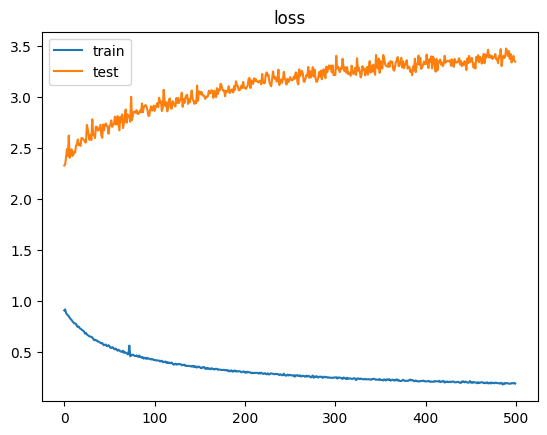

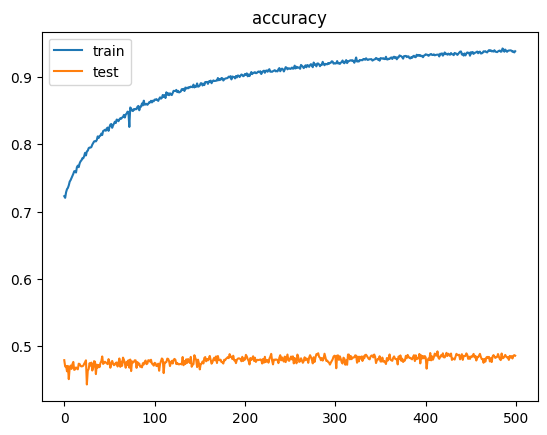

In [25]:
plt.plot(vgg16_bn_hist.history['loss'])
plt.plot(vgg16_bn_hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss.png",dpi=300,format="png")
plt.figure()
plt.plot(vgg16_bn_hist.history['accuracy'])
plt.plot(vgg16_bn_hist.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
# plt.savefig("accuracy.png",dpi=300,format="png")


# VGG16 + BN + media y varianza añadida de BN añadidos a la capa final


In [31]:
vgg16_bn_v2 = VGG16_model_BN_v2()
vgg16_bn_v2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "VGG16_BN_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 16)        448       
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 16)        2320      
                                                                 
 block1_BN (BatchNormalizati  (None, 32, 32, 16)       64        
 on)                                                             
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 16)        0         
                                                                 
 dropout_20 (Dropout)        (None, 16, 16, 16)        0         
                                                       

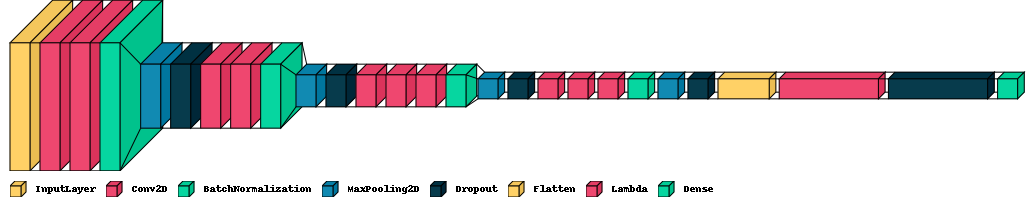

In [32]:
vgg16_bn_v2.summary()
tf.keras.utils.plot_model(vgg16_bn_v2, show_shapes=True, show_layer_names=True)
visualkeras.layered_view(vgg16_bn_v2, legend=True)

In [33]:
from tensorflow import keras

# Vamos a hacer un Callback cada batch para comprobar que se actualizan los pesos
# de cada batch. Para ello, haremos una media de los pesos mean y variance.
class CustomCallback(keras.callbacks.Callback):
    def on_batch_end(self, batch, logs=None):
        if batch % 50 == 0:
            means=[]
            variances=[]
            bn_layers = [layer for layer in self.model.layers if isinstance(layer, BatchNormalization)]
            for layer in bn_layers:
                mean,variance = layer.get_weights()[2:4]
                means.append(mean.mean())
                variances.append(variance.mean())

            print(f"\nWeights after batch {batch}: mean={means}, variance={variances}")


custom_callback = CustomCallback()


In [34]:
ultima_epoca, nueva_epoca, ultimo_archivo=extraer_epocas(nombre="VGG16_cifar100_BN_v2", epochs=epochs)
if ultimo_archivo:
    #load weights
    vgg16_bn_v2.load_weights(ultimo_archivo)

start_time = time.time()
vgg16_bn_v2_hist=vgg16_bn_v2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[model_checkpoint_callback("VGG16_cifar100_BN_v2")]) # callbacks=[custom_callback]
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time} segundos.")

El nuevo entrenamiento se hará desde la época 0 hasta la época 500 para VGG16_cifar100_BN_v2, usando el archivo None.
Epoch 1/500
625/625 [==============================] - 5s 7ms/step - loss: 5.6874 - accuracy: 0.0463 - val_loss: 4.9223 - val_accuracy: 0.0998
Epoch 2/500
625/625 [==============================] - 5s 7ms/step - loss: 6.3632 - accuracy: 0.0860 - val_loss: 6.0626 - val_accuracy: 0.1402
Epoch 3/500
625/625 [==============================] - 5s 7ms/step - loss: 7.0507 - accuracy: 0.1161 - val_loss: 7.5261 - val_accuracy: 0.1194
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 7.4993 - accuracy: 0.1377 - val_loss: 7.3044 - val_accuracy: 0.1846
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 8.6667 - accuracy: 0.1554 - val_loss: 9.0195 - val_accuracy: 0.1700
Epoch 6/500
625/625 [==============================] - 6s 10ms/step - loss: 9.9670 - accuracy: 0.1752 - val_loss: 12.5144 - val_accuracy: 0.1645
Epoch 7/500
625/625 [=

In [35]:
# Guardar los pesos
vgg16_bn_v2.save_weights(f'./models/VGG16_cifar100_BN_v2_epoch{ultima_epoca}-{nueva_epoca}.h5')

# Guardar history
with open(f'./models/VGG16_cifar100_BN_v2_epoch{ultima_epoca}-{nueva_epoca}_hist.pkl', 'wb') as f:
    pickle.dump(vgg16_bn_v2_hist.history, f)

with open(f'./models/VGG16_cifar100_BN_v2_epoch{ultima_epoca}-{nueva_epoca}_hist.json', 'w') as f:
    json.dump(vgg16_bn_v2_hist.history, f)

Text(0.5, 1.0, 'accuracy')

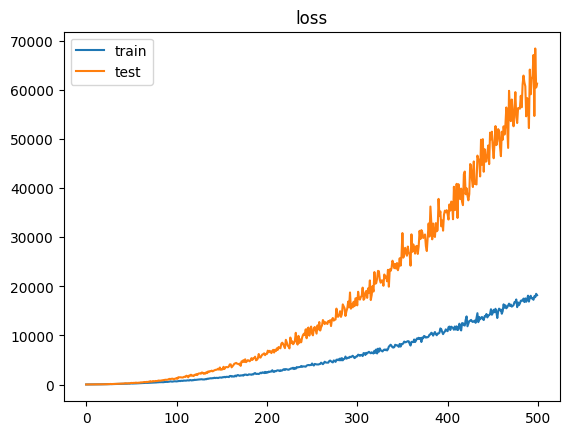

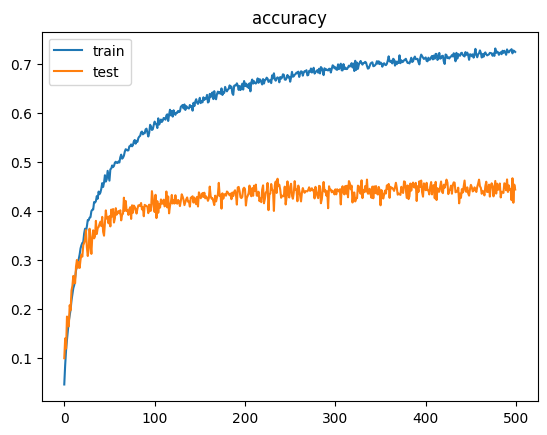

In [36]:
plt.plot(vgg16_bn_v2_hist.history['loss'])
plt.plot(vgg16_bn_v2_hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss.png",dpi=300,format="png")
plt.figure()
plt.plot(vgg16_bn_v2_hist.history['accuracy'])
plt.plot(vgg16_bn_v2_hist.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
# plt.savefig("accuracy.png",dpi=300,format="png")


# VGG16 GDN

In [37]:
vgg16_gdn = VGG16_model_GDN()
vgg16_gdn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
vgg16_gdn.summary()


Model: "VGG16_GDN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 16)        448       
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 16)        2320      
                                                                 
 block1_GDN (GDN)            (None, 32, 32, 16)        2352      
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 16)        0         
                                                                 
 dropout_25 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 32)        4640      
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 32)        92

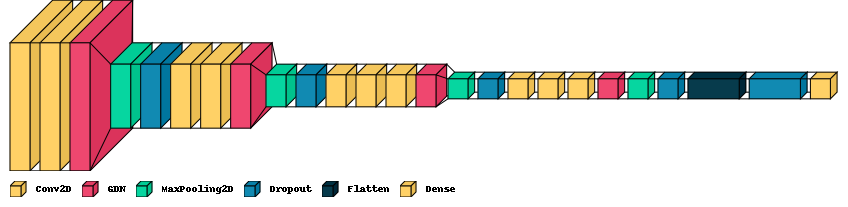

In [38]:
visualkeras.layered_view(vgg16_gdn, legend=True)

In [39]:
ultima_epoca, nueva_epoca, ultimo_archivo=extraer_epocas(nombre="VGG16_cifar100_GDN", epochs=epochs)
if ultimo_archivo:
    #load weights
    vgg16_gdn.load_weights(ultimo_archivo)

start_time = time.time()
vgg16_gdn_hist=vgg16_gdn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[model_checkpoint_callback(name="VGG16_cifar100_GDN")])
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time} segundos.")

El nuevo entrenamiento se hará desde la época 0 hasta la época 500 para VGG16_cifar100_GDN, usando el archivo None.
Epoch 1/500
625/625 [==============================] - 7s 10ms/step - loss: 4.6060 - accuracy: 0.0087 - val_loss: 4.6060 - val_accuracy: 0.0082
Epoch 2/500
625/625 [==============================] - 5s 9ms/step - loss: 4.6058 - accuracy: 0.0096 - val_loss: 4.6066 - val_accuracy: 0.0087
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 4.6052 - accuracy: 0.0094 - val_loss: 4.6065 - val_accuracy: 0.0086
Epoch 4/500
625/625 [==============================] - 5s 9ms/step - loss: 4.6058 - accuracy: 0.0095 - val_loss: 4.6066 - val_accuracy: 0.0082
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 4.6058 - accuracy: 0.0093 - val_loss: 4.6069 - val_accuracy: 0.0082
Epoch 6/500
625/625 [==============================] - 6s 9ms/step - loss: 4.6057 - accuracy: 0.0096 - val_loss: 4.6068 - val_accuracy: 0.0082
Epoch 7/500
625/625 [====

In [40]:
# Guardar los pesos
vgg16_gdn.save_weights(f'./models/VGG16_cifar100_GDN_epoch{ultima_epoca}-{nueva_epoca}.h5')

# Guardar history
with open(f'./models/VGG16_cifar100_GDN_epoch{ultima_epoca}-{nueva_epoca}_hist.pkl', 'wb') as f:
    pickle.dump(vgg16_gdn_hist.history, f)

with open(f'./models/VGG16_cifar100_GDN_epoch{ultima_epoca}-{nueva_epoca}_hist.json', 'w') as f:
    json.dump(vgg16_gdn_hist.history, f)

Text(0.5, 1.0, 'accuracy')

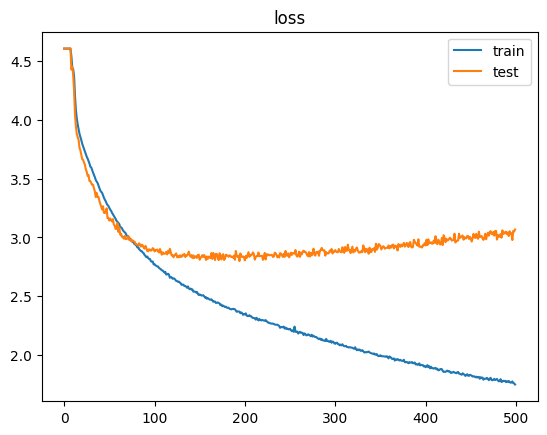

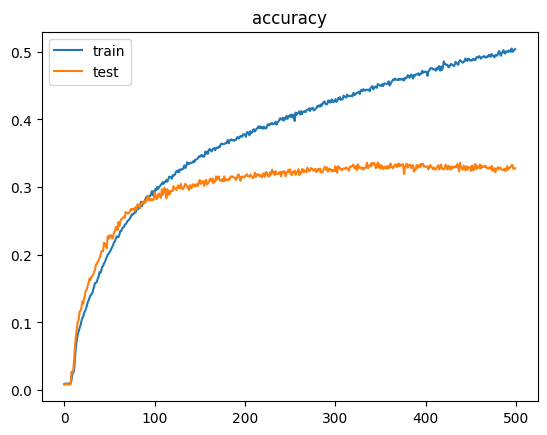

In [41]:
plt.plot(vgg16_gdn_hist.history['loss'])
plt.plot(vgg16_gdn_hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss.png",dpi=300,format="png")
plt.figure()
plt.plot(vgg16_gdn_hist.history['accuracy'])
plt.plot(vgg16_gdn_hist.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
# plt.savefig("accuracy.png",dpi=300,format="png")


# VGG16 + INSTANCE NORMALIZATION


In [42]:
vgg16_in=VGG16_model_IN()
vgg16_in.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

vgg16_in.summary()


Model: "VGG16_IN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 16)        448       
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 16)        2320      
                                                                 
 block1_IN (InstanceNormaliz  (None, 32, 32, 16)       32        
 ation)                                                          
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 16)        0         
                                                                 
 dropout_30 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 32)        4640      
                                                          

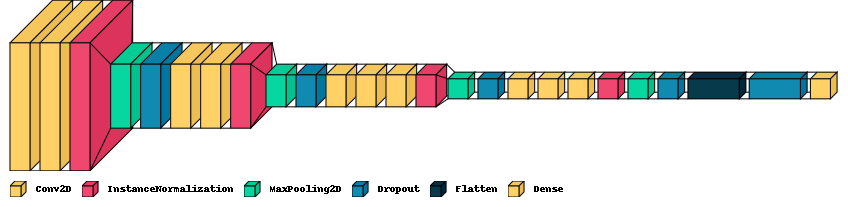

In [43]:
visualkeras.layered_view(vgg16_in, legend=True)

In [44]:
ultima_epoca, nueva_epoca, ultimo_archivo=extraer_epocas(nombre="VGG16_cifar100_IN", epochs=epochs)
if ultimo_archivo:
    #load weights
    vgg16_in.load_weights(ultimo_archivo)

start_time = time.time() 
vgg16_in_hist=vgg16_in.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[model_checkpoint_callback(name="VGG16_cifar100_IN")])
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time} segundos.")

El nuevo entrenamiento se hará desde la época 0 hasta la época 500 para VGG16_cifar100_IN, usando el archivo None.
Epoch 1/500
625/625 [==============================] - 5s 7ms/step - loss: 4.4939 - accuracy: 0.0503 - val_loss: 3.7688 - val_accuracy: 0.1200
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 3.7615 - accuracy: 0.1259 - val_loss: 3.4756 - val_accuracy: 0.1764
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 3.4391 - accuracy: 0.1773 - val_loss: 3.1941 - val_accuracy: 0.2213
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 3.1838 - accuracy: 0.2201 - val_loss: 2.9808 - val_accuracy: 0.2646
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 2.9845 - accuracy: 0.2586 - val_loss: 2.8401 - val_accuracy: 0.2878
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 2.8258 - accuracy: 0.2867 - val_loss: 2.6876 - val_accuracy: 0.3188
Epoch 7/500
625/625 [======

In [45]:
# Guardar los pesos
vgg16_in.save_weights(f'./models/VGG16_cifar100_IN_epoch{ultima_epoca}-{nueva_epoca}.h5')

# Guardar history
with open(f'./models/VGG16_cifar100_IN_epoch{ultima_epoca}-{nueva_epoca}_hist.pkl', 'wb') as f:
    pickle.dump(vgg16_in_hist.history, f)

with open(f'./models/VGG16_cifar100_IN_epoch{ultima_epoca}-{nueva_epoca}_hist.json', 'w') as f:
    json.dump(vgg16_in_hist.history, f)


Text(0.5, 1.0, 'accuracy')

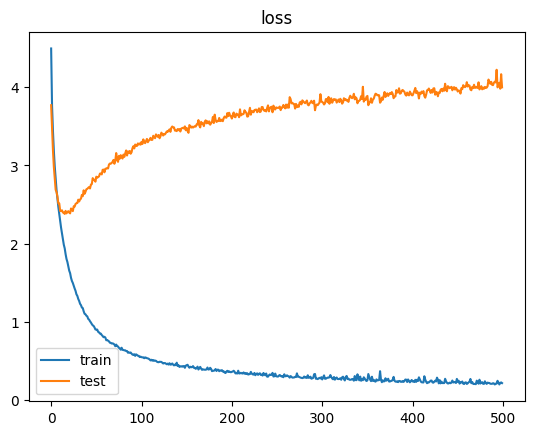

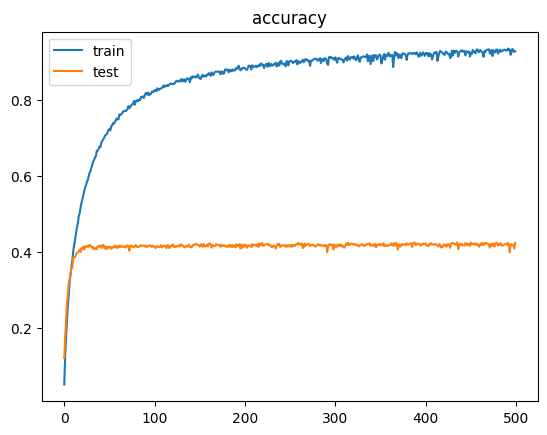

In [46]:
plt.plot(vgg16_in_hist.history['loss'])
plt.plot(vgg16_in_hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss.png",dpi=300,format="png")
plt.figure()
plt.plot(vgg16_in_hist.history['accuracy'])
plt.plot(vgg16_in_hist.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
# plt.savefig("accuracy.png",dpi=300,format="png")


# VGG16 + IN + REUTILIZACIÓN

In [47]:
vgg16_in_v2 = VGG16_model_IN_v2()
vgg16_in_v2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
vgg16_in_v2.summary()

Model: "VGG16_IN_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 16)        448       
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 16)        2320      
                                                                 
 block1_IN (ModifiedInstance  (None, 32, 32, 16)       32        
 Normalization)                                                  
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 16)        0         
                                                                 
 dropout_35 (Dropout)        (None, 16, 16, 16)        0         
                                                       

In [48]:
ultima_epoca, nueva_epoca, ultimo_archivo=extraer_epocas(nombre="VGG16_cifar100_IN_v2", epochs=epochs)
if ultimo_archivo:
    #load weights
    vgg16_in_v2.load_weights(ultimo_archivo)

start_time = time.time()
vgg16_in_v2_hist=vgg16_in_v2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[model_checkpoint_callback(name="VGG16_cifar100_IN_v2")])
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time} segundos.")

El nuevo entrenamiento se hará desde la época 0 hasta la época 500 para VGG16_cifar100_IN_v2, usando el archivo None.
Epoch 1/500
625/625 [==============================] - 6s 8ms/step - loss: 4.4055 - accuracy: 0.0595 - val_loss: 3.7307 - val_accuracy: 0.1304
Epoch 2/500
625/625 [==============================] - 5s 8ms/step - loss: 3.6924 - accuracy: 0.1386 - val_loss: 3.3288 - val_accuracy: 0.1907
Epoch 3/500
625/625 [==============================] - 5s 8ms/step - loss: 3.3601 - accuracy: 0.1924 - val_loss: 3.1411 - val_accuracy: 0.2378
Epoch 4/500
625/625 [==============================] - 4s 7ms/step - loss: 3.1483 - accuracy: 0.2329 - val_loss: 2.9689 - val_accuracy: 0.2656
Epoch 5/500
625/625 [==============================] - 5s 9ms/step - loss: 3.0066 - accuracy: 0.2579 - val_loss: 2.8361 - val_accuracy: 0.2981
Epoch 6/500
625/625 [==============================] - 5s 9ms/step - loss: 2.8772 - accuracy: 0.2830 - val_loss: 2.8226 - val_accuracy: 0.2967
Epoch 7/500
625/625 [===

In [49]:
# Guardar los pesos
vgg16_in_v2.save_weights(f'./models/VGG16_cifar100_IN_v2_epoch{ultima_epoca}-{nueva_epoca}.h5')

# Guardar history
with open(f'./models/VGG16_cifar100_IN_v2_epoch{ultima_epoca}-{nueva_epoca}_hist.pkl', 'wb') as f:
    pickle.dump(vgg16_in_v2_hist.history, f)

with open(f'./models/VGG16_cifar100_IN_v2_epoch{ultima_epoca}-{nueva_epoca}_hist.json', 'w') as f:
    json.dump(vgg16_in_v2_hist.history, f)

Text(0.5, 1.0, 'accuracy')

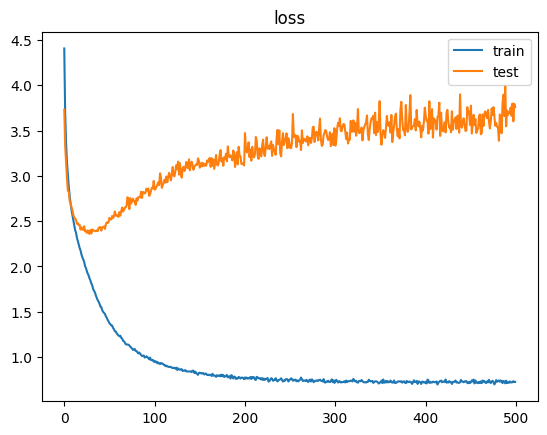

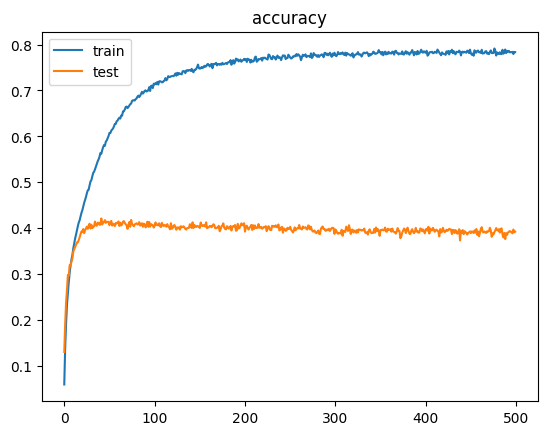

In [50]:
plt.plot(vgg16_in_v2_hist.history['loss'])
plt.plot(vgg16_in_v2_hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss.png",dpi=300,format="png")
plt.figure()
plt.plot(vgg16_in_v2_hist.history['accuracy'])
plt.plot(vgg16_in_v2_hist.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
# plt.savefig("accuracy.png",dpi=300,format="png")

# VGG16 GDN + Reutilización

In [57]:
vgg16_gdn_v2 = VGG16_model_GDN_v2()
vgg16_gdn_v2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "VGG16_GDN_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 16)        448       
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 16)        2320      
                                                                 
 block1_GDN (GDN)            (None, 32, 32, 16)        2352      
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 16)        0         
                                                                 
 dropout_50 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 32)       

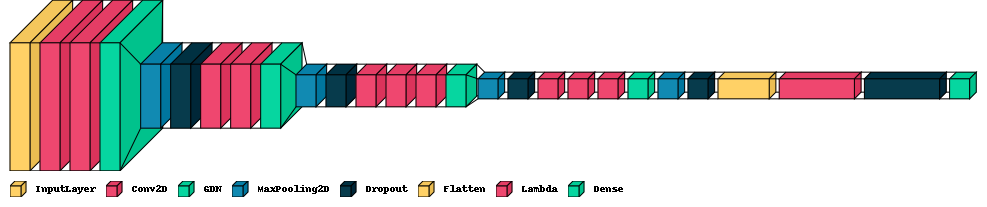

In [58]:
vgg16_gdn_v2.summary()
tf.keras.utils.plot_model(vgg16_gdn_v2, show_shapes=True, show_layer_names=True)
visualkeras.layered_view(vgg16_gdn_v2, legend=True)

In [60]:
ultima_epoca, nueva_epoca, ultimo_archivo=extraer_epocas(nombre="VGG16_cifar100_GDN_v2", epochs=epochs)
if ultimo_archivo:
    #load weights
    vgg16_gdn_v2.load_weights(ultimo_archivo)

start_time = time.time()
vgg16_gdn_v2_hist=vgg16_gdn_v2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[model_checkpoint_callback(name="VGG16_cifar100_GDN_v2")])
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time} segundos.")

El nuevo entrenamiento se hará desde la época 0 hasta la época 500 para VGG16_cifar100_GDN_v2, usando el archivo None.
Epoch 1/500
625/625 [==============================] - 6s 10ms/step - loss: 2.9830 - accuracy: 0.2497 - val_loss: 2.8598 - val_accuracy: 0.2835
Epoch 2/500
625/625 [==============================] - 6s 9ms/step - loss: 2.9653 - accuracy: 0.2525 - val_loss: 2.8542 - val_accuracy: 0.2793
Epoch 3/500
625/625 [==============================] - 6s 10ms/step - loss: 2.9669 - accuracy: 0.2505 - val_loss: 2.8959 - val_accuracy: 0.2748
Epoch 4/500
625/625 [==============================] - 6s 9ms/step - loss: 2.9569 - accuracy: 0.2551 - val_loss: 2.8392 - val_accuracy: 0.2848
Epoch 5/500
625/625 [==============================] - 6s 9ms/step - loss: 2.9380 - accuracy: 0.2555 - val_loss: 2.8693 - val_accuracy: 0.2808
Epoch 6/500
625/625 [==============================] - 6s 9ms/step - loss: 2.9280 - accuracy: 0.2578 - val_loss: 2.8507 - val_accuracy: 0.2844
Epoch 7/500
625/625 [

In [61]:
# Guardar los pesos
vgg16_gdn_v2.save_weights(f'./models/VGG16_cifar100_GDN_v2_epoch{ultima_epoca}-{nueva_epoca}.h5')

# Guardar history
with open(f'./models/VGG16_cifar100_GDN_v2_epoch{ultima_epoca}-{nueva_epoca}_hist.pkl', 'wb') as f:
    pickle.dump(vgg16_gdn_v2_hist.history, f)

with open(f'./models/VGG16_cifar100_GDN_v2_epoch{ultima_epoca}-{nueva_epoca}_hist.json', 'w') as f:
    json.dump(vgg16_gdn_v2_hist.history, f)

Text(0.5, 1.0, 'accuracy')

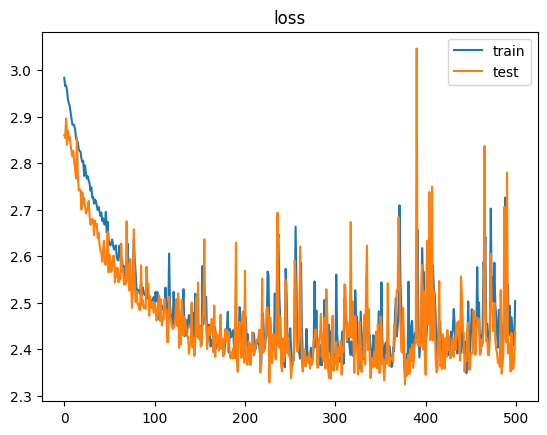

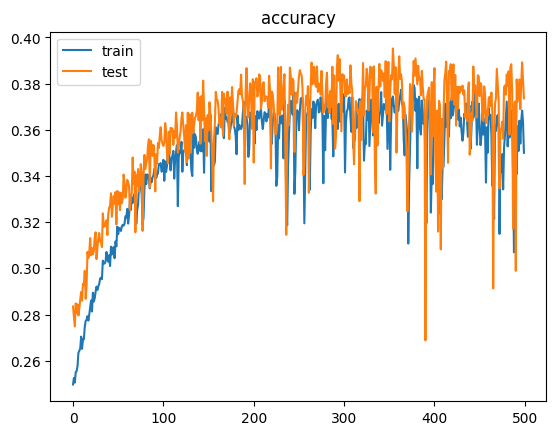

In [62]:
plt.plot(vgg16_gdn_v2_hist.history['loss'])
plt.plot(vgg16_gdn_v2_hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss.png",dpi=300,format="png")
plt.figure()
plt.plot(vgg16_gdn_v2_hist.history['accuracy'])
plt.plot(vgg16_gdn_v2_hist.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
# plt.savefig("accuracy.png",dpi=300,format="png")


# PERCEPTNET



In [63]:
perceptnet=PerceptNet()
perceptnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

perceptnet.summary()

Model: "PerceptNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 3)         12        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 3)        0         
 )                                                               
                                                                 
 dropout_55 (Dropout)        (None, 16, 16, 3)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 6)         456       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 6)          0         
 2D)                                                             
                                                                 
 dropout_56 (Dropout)        (None, 8, 8, 6)           0

In [64]:
ultima_epoca, nueva_epoca, ultimo_archivo=extraer_epocas(nombre="PerceptNet_cifar100", epochs=epochs)
if ultimo_archivo:
    #load weights
    perceptnet.load_weights(ultimo_archivo)

start_time = time.time()
hist_perceptnet=perceptnet.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[model_checkpoint_callback(name="PerceptNet_cifar100")])
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time} segundos.")

El nuevo entrenamiento se hará desde la época 0 hasta la época 500 para PerceptNet_cifar100, usando el archivo None.
Epoch 1/500
625/625 [==============================] - 3s 4ms/step - loss: 4.3706 - accuracy: 0.0332 - val_loss: 4.5648 - val_accuracy: 0.0403
Epoch 2/500
625/625 [==============================] - 2s 3ms/step - loss: 4.1518 - accuracy: 0.0643 - val_loss: 4.4569 - val_accuracy: 0.0451
Epoch 3/500
625/625 [==============================] - 2s 3ms/step - loss: 4.0551 - accuracy: 0.0809 - val_loss: 4.2393 - val_accuracy: 0.0675
Epoch 4/500
625/625 [==============================] - 2s 3ms/step - loss: 3.9836 - accuracy: 0.0940 - val_loss: 4.2079 - val_accuracy: 0.0686
Epoch 5/500
625/625 [==============================] - 2s 3ms/step - loss: 3.9188 - accuracy: 0.1053 - val_loss: 4.0467 - val_accuracy: 0.0811
Epoch 6/500
625/625 [==============================] - 2s 3ms/step - loss: 3.8718 - accuracy: 0.1123 - val_loss: 3.9203 - val_accuracy: 0.1067
Epoch 7/500
625/625 [====

In [65]:
# Guardar los pesos
perceptnet.save_weights(f'./models/PerceptNet_cifar100_epoch{ultima_epoca}-{nueva_epoca}.h5')

# Guardar history
with open(f'./models/PerceptNet_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.pkl', 'wb') as f:
    pickle.dump(hist_perceptnet.history, f)

with open(f'./models/PerceptNet_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.json', 'w') as f:
    json.dump(hist_perceptnet.history, f)


Text(0.5, 1.0, 'accuracy')

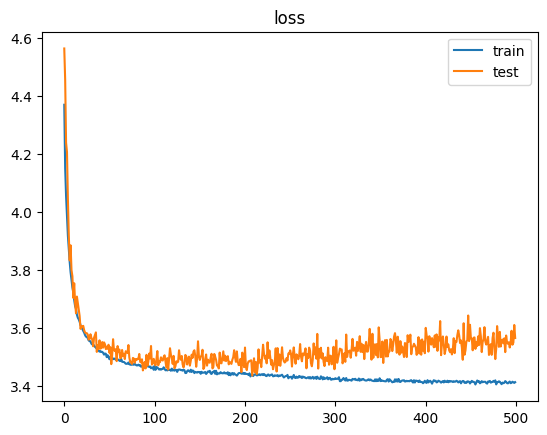

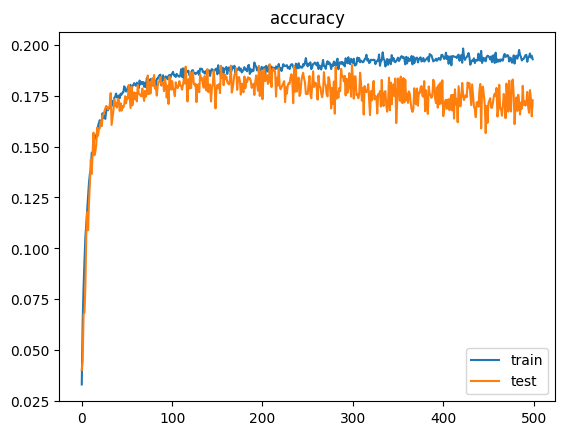

In [66]:
plt.plot(hist_perceptnet.history['loss'])
plt.plot(hist_perceptnet.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss.png",dpi=300,format="png")
plt.figure()
plt.plot(hist_perceptnet.history['accuracy'])
plt.plot(hist_perceptnet.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
# plt.savefig("accuracy.png",dpi=300,format="png")


# PERCEPTNET GDN



In [67]:
perceptnet_gdn=PerceptNet_GDN()
perceptnet_gdn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

perceptnet_gdn.summary()

Model: "PerceptNet_GDN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gdn (GDN)                   (None, 32, 32, 3)         18        
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 3)         12        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 3)        0         
 2D)                                                             
                                                                 
 gdn_1 (GDN)                 (None, 16, 16, 3)         18        
                                                                 
 dropout_59 (Dropout)        (None, 16, 16, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 6)         456       
                                                    

In [68]:
ultima_epoca, nueva_epoca, ultimo_archivo=extraer_epocas(nombre="PerceptNet_GDN_cifar100", epochs=epochs)
if ultimo_archivo:
    #load weights
    perceptnet_gdn.load_weights(ultimo_archivo)

start_time = time.time()
hist_perceptnet_gdn=perceptnet_gdn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[model_checkpoint_callback(name="PerceptNet_GDN_cifar100")])
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time} segundos.")

El nuevo entrenamiento se hará desde la época 0 hasta la época 500 para PerceptNet_GDN_cifar100, usando el archivo None.
Epoch 1/500
625/625 [==============================] - 4s 5ms/step - loss: 4.4933 - accuracy: 0.0255 - val_loss: 4.3301 - val_accuracy: 0.0418
Epoch 2/500
625/625 [==============================] - 3s 5ms/step - loss: 4.2671 - accuracy: 0.0460 - val_loss: 4.2189 - val_accuracy: 0.0520
Epoch 3/500
625/625 [==============================] - 3s 6ms/step - loss: 4.1436 - accuracy: 0.0597 - val_loss: 4.0737 - val_accuracy: 0.0733
Epoch 4/500
625/625 [==============================] - 3s 5ms/step - loss: 4.0446 - accuracy: 0.0752 - val_loss: 3.9878 - val_accuracy: 0.0870
Epoch 5/500
625/625 [==============================] - 3s 5ms/step - loss: 3.9575 - accuracy: 0.0867 - val_loss: 3.8837 - val_accuracy: 0.1064
Epoch 6/500
625/625 [==============================] - 3s 5ms/step - loss: 3.8925 - accuracy: 0.0983 - val_loss: 3.8061 - val_accuracy: 0.1178
Epoch 7/500
625/625 [

In [69]:
# Guardar los pesos
perceptnet_gdn.save_weights(f'./models/PerceptNet_GDN_cifar100_epoch{ultima_epoca}-{nueva_epoca}.h5')

# Guardar history
with open(f'./models/PerceptNet_GDN_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.pkl', 'wb') as f:
    pickle.dump(hist_perceptnet_gdn.history, f)

with open(f'./models/PerceptNet_GDN_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.json', 'w') as f:
    json.dump(hist_perceptnet_gdn.history, f)


Text(0.5, 1.0, 'accuracy')

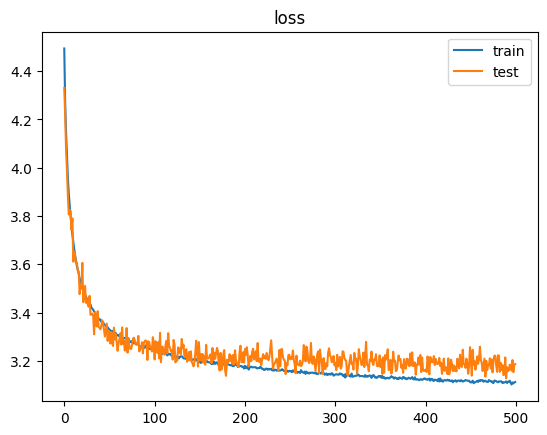

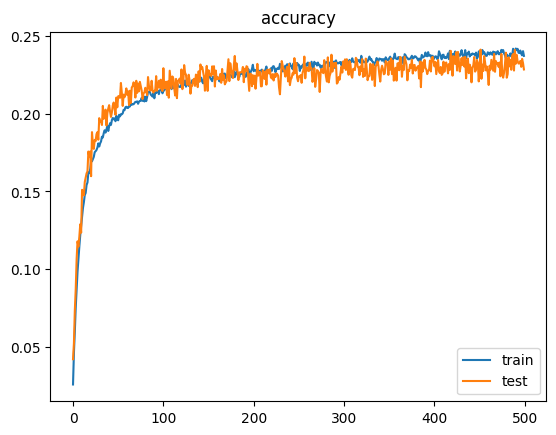

In [70]:
plt.plot(hist_perceptnet_gdn.history['loss'])
plt.plot(hist_perceptnet_gdn.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss.png",dpi=300,format="png")
plt.figure()
plt.plot(hist_perceptnet_gdn.history['accuracy'])
plt.plot(hist_perceptnet_gdn.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
# plt.savefig("accuracy.png",dpi=300,format="png")


# PerceptNet GDN + Reutilización

In [76]:
perceptnet_gdn_v2=PerceptNet_GDN_v2()
perceptnet_gdn_v2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

perceptnet_gdn_v2.summary()

Model: "PerceptNet_GDN_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 GDN1 (GDN)                  (None, 32, 32, 3)         90        
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 3)         12        
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 16, 16, 3)         0         
                                                                 
 GDN2 (GDN)                  (None, 16, 16, 3)         90        
                                                                 
 dropout_102 (Dropout)       (None, 16, 16, 3)         0         
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 6)   

In [77]:
ultima_epoca, nueva_epoca, ultimo_archivo=extraer_epocas(nombre="PerceptNet_GDN_v2_cifar100", epochs=epochs)
if ultimo_archivo:
    #load weights
    perceptnet_gdn_v2.load_weights(ultimo_archivo)

start_time = time.time()
hist_perceptnet_gdn_v2=perceptnet_gdn_v2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[model_checkpoint_callback(name="PerceptNet_GDN_v2_cifar100")])
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time} segundos.")

El nuevo entrenamiento se hará desde la época 0 hasta la época 500 para PerceptNet_GDN_v2_cifar100, usando el archivo None.
Epoch 1/500
625/625 [==============================] - 4s 6ms/step - loss: 4.9159 - accuracy: 0.0121 - val_loss: 4.5805 - val_accuracy: 0.0200
Epoch 2/500
625/625 [==============================] - 3s 6ms/step - loss: 4.5565 - accuracy: 0.0223 - val_loss: 4.3706 - val_accuracy: 0.0311
Epoch 3/500
625/625 [==============================] - 4s 6ms/step - loss: 4.4305 - accuracy: 0.0284 - val_loss: 4.3572 - val_accuracy: 0.0283
Epoch 4/500
625/625 [==============================] - 4s 6ms/step - loss: 4.3894 - accuracy: 0.0303 - val_loss: 4.3310 - val_accuracy: 0.0378
Epoch 5/500
625/625 [==============================] - 4s 6ms/step - loss: 4.3673 - accuracy: 0.0320 - val_loss: 4.2703 - val_accuracy: 0.0348
Epoch 6/500
625/625 [==============================] - 3s 5ms/step - loss: 4.3299 - accuracy: 0.0349 - val_loss: 4.2463 - val_accuracy: 0.0426
Epoch 7/500
625/62

In [78]:
# Guardar los pesos
perceptnet_gdn_v2.save_weights(f'./models/PerceptNet_GDN_v2_cifar100_epoch{ultima_epoca}-{nueva_epoca}.h5')

# Guardar history
with open(f'./models/PerceptNet_GDN_v2_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.pkl', 'wb') as f:
    pickle.dump(hist_perceptnet_gdn_v2.history, f)

with open(f'./models/PerceptNet_GDN_v2_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.json', 'w') as f:
    json.dump(hist_perceptnet_gdn_v2.history, f)


Text(0.5, 1.0, 'accuracy')

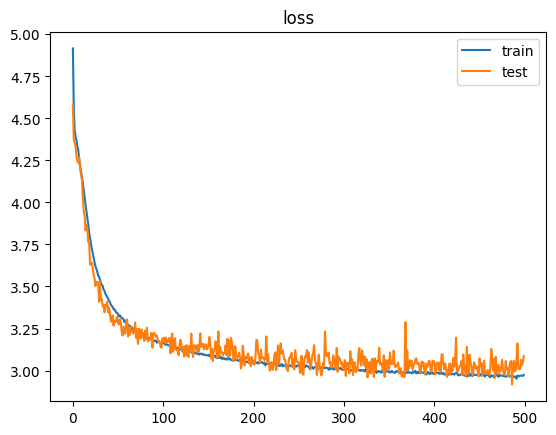

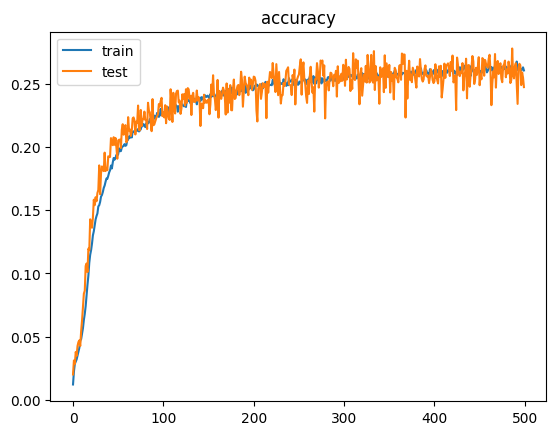

In [79]:
plt.plot(hist_perceptnet_gdn_v2.history['loss'])
plt.plot(hist_perceptnet_gdn_v2.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss.png",dpi=300,format="png")
plt.figure()
plt.plot(hist_perceptnet_gdn_v2.history['accuracy'])
plt.plot(hist_perceptnet_gdn_v2.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
# plt.savefig("accuracy.png",dpi=300,format="png")


# PerceptNet Batch Normalization


In [80]:
perceptnet_bn=PerceptNet_BN()
perceptnet_bn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

perceptnet_bn.summary()

Model: "PerceptNet_BN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 32, 32, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 3)         12        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 3)        0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 3)        12        
 hNormalization)                                                 
                                                                 
 dropout_106 (Dropout)       (None, 16, 16, 3)         0         
                                                     

In [81]:
ultima_epoca, nueva_epoca, ultimo_archivo=extraer_epocas(nombre="PerceptNet_BN_cifar100", epochs=epochs)
if ultimo_archivo:
    #load weights
    perceptnet_bn.load_weights(ultimo_archivo)

start_time = time.time()
hist_perceptnet_bn=perceptnet_bn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[model_checkpoint_callback(name="PerceptNet_BN_cifar100")])
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time} segundos.")

El nuevo entrenamiento se hará desde la época 0 hasta la época 500 para PerceptNet_BN_cifar100, usando el archivo None.
Epoch 1/500
625/625 [==============================] - 3s 4ms/step - loss: 4.1255 - accuracy: 0.0667 - val_loss: 4.1380 - val_accuracy: 0.0731
Epoch 2/500
625/625 [==============================] - 2s 4ms/step - loss: 3.9177 - accuracy: 0.1016 - val_loss: 4.0005 - val_accuracy: 0.0888
Epoch 3/500
625/625 [==============================] - 2s 3ms/step - loss: 3.8374 - accuracy: 0.1152 - val_loss: 3.9043 - val_accuracy: 0.1058
Epoch 4/500
625/625 [==============================] - 2s 3ms/step - loss: 3.7819 - accuracy: 0.1239 - val_loss: 3.8821 - val_accuracy: 0.1056
Epoch 5/500
625/625 [==============================] - 2s 4ms/step - loss: 3.7334 - accuracy: 0.1310 - val_loss: 3.8125 - val_accuracy: 0.1226
Epoch 6/500
625/625 [==============================] - 2s 3ms/step - loss: 3.7067 - accuracy: 0.1382 - val_loss: 3.7722 - val_accuracy: 0.1235
Epoch 7/500
625/625 [=

In [82]:
# Guardar los pesos
perceptnet_bn.save_weights(f'./models/PerceptNet_BN_cifar100_epoch{ultima_epoca}-{nueva_epoca}.h5')

# Guardar history
with open(f'./models/PerceptNet_BN_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.pkl', 'wb') as f:
    pickle.dump(hist_perceptnet_bn.history, f)

with open(f'./models/PerceptNet_BN_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.json', 'w') as f:
    json.dump(hist_perceptnet_bn.history, f)


Text(0.5, 1.0, 'accuracy')

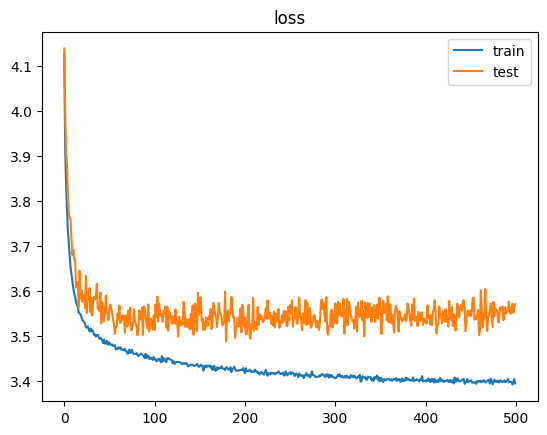

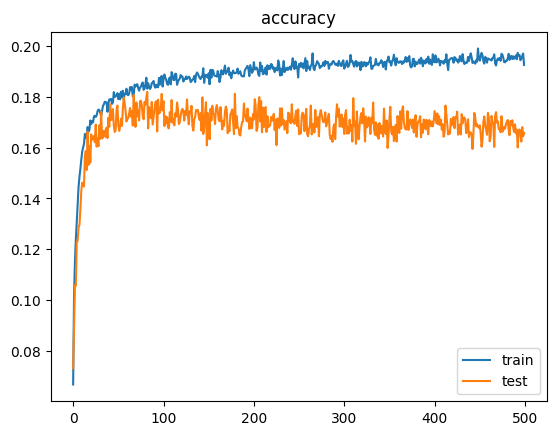

In [83]:
plt.plot(hist_perceptnet_bn.history['loss'])
plt.plot(hist_perceptnet_bn.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss.png",dpi=300,format="png")
plt.figure()
plt.plot(hist_perceptnet_bn.history['accuracy'])
plt.plot(hist_perceptnet_bn.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
# plt.savefig("accuracy.png",dpi=300,format="png")


# PerceptNet Batch Normalization + Reutilización


In [84]:
perceptnet_bn_v2 = PerceptNet_BN_v2()
perceptnet_bn_v2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
perceptnet_bn_v2.summary()

Model: "PerceptNet_BN_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 BN1 (BatchNormalization)    (None, 32, 32, 3)         12        
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 3)         12        
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 16, 16, 3)         0         
                                                                 
 BN2 (BatchNormalization)    (None, 16, 16, 3)         12        
                                                                 
 dropout_110 (Dropout)       (None, 16, 16, 3)         0         
                                                                 
 conv2 (Conv2D)              (None, 16, 16, 6)    

In [85]:
ultima_epoca, nueva_epoca, ultimo_archivo=extraer_epocas(nombre="PerceptNet_BN_v2_cifar100", epochs=epochs)
if ultimo_archivo:
    #load weights
    perceptnet_bn_v2.load_weights(ultimo_archivo)

start_time = time.time()
hist_perceptnet_bn_v2=perceptnet_bn_v2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[model_checkpoint_callback(name="PerceptNet_BN_v2_cifar100")])
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time} segundos.")

El nuevo entrenamiento se hará desde la época 0 hasta la época 500 para PerceptNet_BN_v2_cifar100, usando el archivo None.
Epoch 1/500
625/625 [==============================] - 3s 5ms/step - loss: 4.1657 - accuracy: 0.0619 - val_loss: 4.1039 - val_accuracy: 0.0746
Epoch 2/500
625/625 [==============================] - 2s 4ms/step - loss: 3.9605 - accuracy: 0.0896 - val_loss: 4.0116 - val_accuracy: 0.0878
Epoch 3/500
625/625 [==============================] - 3s 5ms/step - loss: 3.8963 - accuracy: 0.0991 - val_loss: 3.9626 - val_accuracy: 0.0947
Epoch 4/500
625/625 [==============================] - 5s 8ms/step - loss: 3.8481 - accuracy: 0.1077 - val_loss: 3.8510 - val_accuracy: 0.1036
Epoch 5/500
625/625 [==============================] - 5s 8ms/step - loss: 3.8077 - accuracy: 0.1163 - val_loss: 3.8030 - val_accuracy: 0.1232
Epoch 6/500
625/625 [==============================] - 5s 8ms/step - loss: 3.7808 - accuracy: 0.1201 - val_loss: 3.7622 - val_accuracy: 0.1278
Epoch 7/500
625/625

In [86]:
# Guardar los pesos
perceptnet_bn_v2.save_weights(f'./models/PerceptNet_BN_v2_cifar100_epoch{ultima_epoca}-{nueva_epoca}.h5')

# Guardar history
with open(f'./models/PerceptNet_BN_v2_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.pkl', 'wb') as f:
    pickle.dump(hist_perceptnet_bn_v2.history, f)

with open(f'./models/PerceptNet_BN_v2_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.json', 'w') as f:
    json.dump(hist_perceptnet_bn_v2.history, f)


Text(0.5, 1.0, 'accuracy')

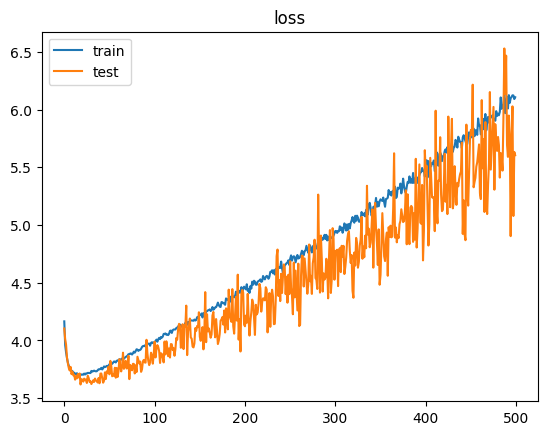

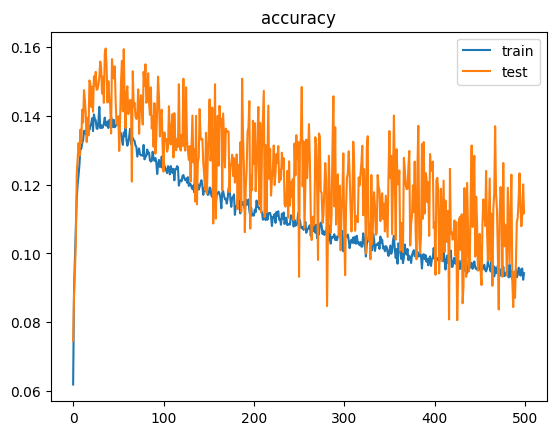

In [87]:
plt.plot(hist_perceptnet_bn_v2.history['loss'])
plt.plot(hist_perceptnet_bn_v2.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss.png",dpi=300,format="png")
plt.figure()
plt.plot(hist_perceptnet_bn_v2.history['accuracy'])
plt.plot(hist_perceptnet_bn_v2.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
# plt.savefig("accuracy.png",dpi=300,format="png")


# PerceptNet Instance Normalization

In [88]:
perceptnet_in=PerceptNet_IN()
perceptnet_in.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

perceptnet_in.summary()

Model: "PerceptNet_IN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 instance_normalization (Ins  (None, 32, 32, 3)        6         
 tanceNormalization)                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 3)         12        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 3)        0         
 2D)                                                             
                                                                 
 instance_normalization_1 (I  (None, 16, 16, 3)        6         
 nstanceNormalization)                                           
                                                                 
 dropout_114 (Dropout)       (None, 16, 16, 3)         0         
                                                     

In [89]:
ultima_epoca, nueva_epoca, ultimo_archivo=extraer_epocas(nombre="PerceptNet_IN_cifar100", epochs=epochs)
if ultimo_archivo:
    #load weights
    perceptnet_in.load_weights(ultimo_archivo)

start_time = time.time()
hist_perceptnet_in=perceptnet_in.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[model_checkpoint_callback(name="PerceptNet_IN_cifar100")])
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time} segundos.")

El nuevo entrenamiento se hará desde la época 0 hasta la época 500 para PerceptNet_IN_cifar100, usando el archivo None.
Epoch 1/500
625/625 [==============================] - 4s 5ms/step - loss: 4.6086 - accuracy: 0.0100 - val_loss: 4.6062 - val_accuracy: 0.0097
Epoch 2/500
625/625 [==============================] - 3s 5ms/step - loss: 4.6084 - accuracy: 0.0105 - val_loss: 4.6066 - val_accuracy: 0.0082
Epoch 3/500
625/625 [==============================] - 3s 4ms/step - loss: 4.6086 - accuracy: 0.0101 - val_loss: 4.6067 - val_accuracy: 0.0088
Epoch 4/500
625/625 [==============================] - 2s 4ms/step - loss: 4.6084 - accuracy: 0.0106 - val_loss: 4.6069 - val_accuracy: 0.0086
Epoch 5/500
625/625 [==============================] - 3s 5ms/step - loss: 4.6081 - accuracy: 0.0102 - val_loss: 4.6068 - val_accuracy: 0.0089
Epoch 6/500
625/625 [==============================] - 3s 5ms/step - loss: 4.6079 - accuracy: 0.0105 - val_loss: 4.6066 - val_accuracy: 0.0086
Epoch 7/500
625/625 [=

In [90]:
# Guardar los pesos
perceptnet_in.save_weights(f'./models/PerceptNet_IN_cifar100_epoch{ultima_epoca}-{nueva_epoca}.h5')

# Guardar history
with open(f'./models/PerceptNet_IN_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.pkl', 'wb') as f:
    pickle.dump(hist_perceptnet_in.history, f)

with open(f'./models/PerceptNet_IN_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.json', 'w') as f:
    json.dump(hist_perceptnet_in.history, f)


Text(0.5, 1.0, 'accuracy')

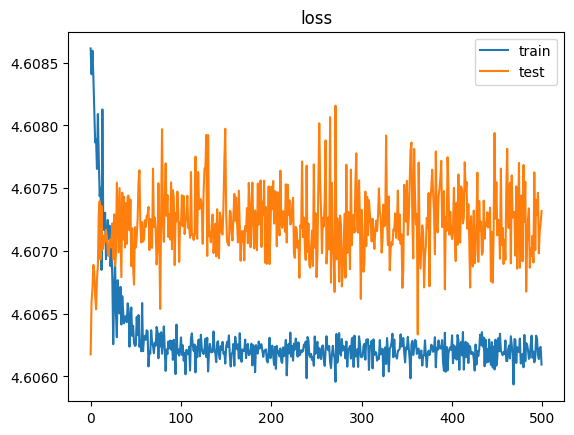

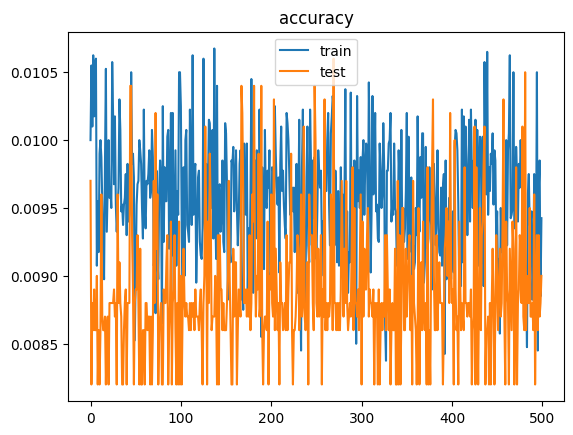

In [91]:
plt.plot(hist_perceptnet_in.history['loss'])
plt.plot(hist_perceptnet_in.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss.png",dpi=300,format="png")
plt.figure()
plt.plot(hist_perceptnet_in.history['accuracy'])
plt.plot(hist_perceptnet_in.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
# plt.savefig("accuracy.png",dpi=300,format="png")


# PerceptNet IN + REUTILIZACIÓN

In [92]:
perceptnet_in_v2=PerceptNet_IN_v2()
perceptnet_in_v2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
perceptnet_in_v2.summary()


Model: "PerceptNet_IN_v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 IN1 (ModifiedInstanceNormal  (None, 32, 32, 3)        6         
 ization)                                                        
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 3)         12        
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 16, 16, 3)         0         
                                                                 
 IN2 (ModifiedInstanceNormal  (None, 16, 16, 3)        6         
 ization)                                                        
                                                                 
 dropout_118 (Dropout)       (None, 16, 16, 3)    

In [93]:
ultima_epoca, nueva_epoca, ultimo_archivo=extraer_epocas(nombre="PerceptNet_IN_v2_cifar100", epochs=epochs)
if ultimo_archivo:
    #load weights
    perceptnet_in_v2.load_weights(ultimo_archivo)

start_time = time.time()
hist_perceptnet_in_v2=perceptnet_in_v2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), callbacks=[model_checkpoint_callback(name="PerceptNet_IN_v2_cifar100")])
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución del entrenamiento fue de {execution_time} segundos.")

El nuevo entrenamiento se hará desde la época 0 hasta la época 500 para PerceptNet_IN_v2_cifar100, usando el archivo None.
Epoch 1/500
625/625 [==============================] - 5s 6ms/step - loss: 4.2332 - accuracy: 0.0680 - val_loss: 3.8667 - val_accuracy: 0.1269
Epoch 2/500
625/625 [==============================] - 4s 6ms/step - loss: 3.8679 - accuracy: 0.1236 - val_loss: 3.6797 - val_accuracy: 0.1493
Epoch 3/500
625/625 [==============================] - 3s 5ms/step - loss: 3.7183 - accuracy: 0.1423 - val_loss: 3.5593 - val_accuracy: 0.1763
Epoch 4/500
625/625 [==============================] - 4s 7ms/step - loss: 3.6390 - accuracy: 0.1592 - val_loss: 3.5099 - val_accuracy: 0.1836
Epoch 5/500
625/625 [==============================] - 3s 5ms/step - loss: 3.5841 - accuracy: 0.1669 - val_loss: 3.4726 - val_accuracy: 0.1939
Epoch 6/500
625/625 [==============================] - 3s 5ms/step - loss: 3.5377 - accuracy: 0.1751 - val_loss: 3.3954 - val_accuracy: 0.2073
Epoch 7/500
625/625

In [94]:
# Guardar los pesos
perceptnet_in_v2.save_weights(f'./models/PerceptNet_IN_v2_cifar100_epoch{ultima_epoca}-{nueva_epoca}.h5')

# Guardar history
with open(f'./models/PerceptNet_IN_v2_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.pkl', 'wb') as f:
    pickle.dump(hist_perceptnet_in_v2.history, f)

with open(f'./models/PerceptNet_IN_v2_cifar100_epoch{ultima_epoca}-{nueva_epoca}_hist.json', 'w') as f:
    json.dump(hist_perceptnet_in_v2.history, f)


Text(0.5, 1.0, 'accuracy')

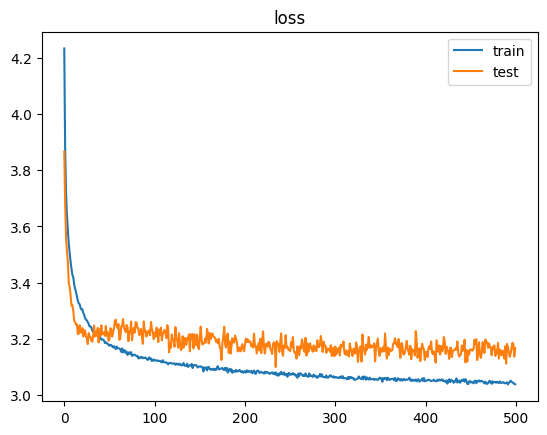

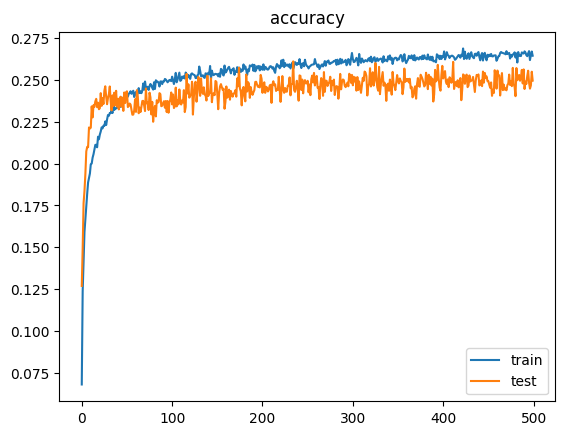

In [95]:
plt.plot(hist_perceptnet_in_v2.history['loss'])
plt.plot(hist_perceptnet_in_v2.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
# plt.savefig("loss.png",dpi=300,format="png")
plt.figure()
plt.plot(hist_perceptnet_in_v2.history['accuracy'])
plt.plot(hist_perceptnet_in_v2.history['val_accuracy'])
plt.legend(['train','test'])
plt.title('accuracy')
# plt.savefig("accuracy.png",dpi=300,format="png")


# Comparación de los modelos: VGG16

Elegir el mejor modelo, seleccionar el mejor modelo y evaluarlo en el conjunto de test.

In [7]:
vgg16=VGG16_model()
vgg16.load_weights("./checkpoints/VGG16_cifar100_checkpoint.h5")

vgg16_bn=VGG16_model_BN()
vgg16_bn.load_weights("./checkpoints/VGG16_cifar100_BN_checkpoint.h5")

vgg16_bn_v2=VGG16_model_BN_v2()
vgg16_bn_v2.load_weights("./checkpoints/VGG16_cifar100_BN_v2_checkpoint.h5")

vgg16_gdn=VGG16_model_GDN()
vgg16_gdn.load_weights("./checkpoints/VGG16_cifar100_GDN_checkpoint.h5")

vgg16_gdn_v2=VGG16_model_GDN_v2()
vgg16_gdn_v2.load_weights("./checkpoints/VGG16_cifar100_GDN_v2_checkpoint.h5")

vgg16_in=VGG16_model_IN()
vgg16_in.load_weights("./checkpoints/VGG16_cifar100_IN_checkpoint.h5")

vgg16_in_v2=VGG16_model_IN_v2()
vgg16_in_v2.load_weights("./checkpoints/VGG16_cifar100_IN_v2_checkpoint.h5")

# Evaluamos los modelos y utilizamos el conjunto de test. Calculamos también Precision, Recall y AUC (también accuracy y loss)
from tensorflow.keras.metrics import Precision, Recall, AUC
import pandas as pd

models = [vgg16, vgg16_bn, vgg16_bn_v2, vgg16_gdn, vgg16_gdn_v2, vgg16_in, vgg16_in_v2]
models_names = ["VGG16", "VGG16_BN", "VGG16_BN_v2", "VGG16_GDN", "VGG16_GDN_v2", "VGG16_IN", "VGG16_IN_v2"]

metrics = []
for model, name in zip(models, models_names):
    print(f"Modelo: {name}")
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall(), AUC()])
    metrics.append(model.evaluate(x_test, y_test))

# Guardar los resultados
with open(f'./results/metrics_cifar100_vgg16.json', 'w') as f:
    json.dump(metrics, f)

# Imprimir los resultados
for name, metric in zip(models_names, metrics):
    print(f"Modelo: {name}")
    print(f"Loss: {metric[0]}")
    print(f"Accuracy: {metric[1]}")
    print(f"Precision: {metric[2]}")
    print(f"Recall: {metric[3]}")
    print(f"AUC: {metric[4]}")
    print("\n")


Modelo: VGG16
313/313 [==============================] - 7s 3ms/step - loss: 2.9737 - accuracy: 0.3945 - precision: 0.5442 - recall: 0.3316 - auc: 0.8781
Modelo: VGG16_BN
313/313 [==============================] - 1s 3ms/step - loss: 3.2755 - accuracy: 0.4828 - precision_1: 0.5320 - recall_1: 0.4641 - auc_1: 0.8592
Modelo: VGG16_BN_v2
313/313 [==============================] - 1s 3ms/step - loss: 53880.6016 - accuracy: 0.4746 - precision_2: 0.4746 - recall_2: 0.4746 - auc_2: 0.7347
Modelo: VGG16_GDN
313/313 [==============================] - 2s 4ms/step - loss: 2.9227 - accuracy: 0.3348 - precision_3: 0.6131 - recall_3: 0.2035 - auc_3: 0.8864
Modelo: VGG16_GDN_v2
313/313 [==============================] - 1s 4ms/step - loss: 2.3239 - accuracy: 0.3984 - precision_4: 0.7374 - recall_4: 0.2179 - auc_4: 0.9347
Modelo: VGG16_IN
313/313 [==============================] - 1s 3ms/step - loss: 3.9480 - accuracy: 0.4290 - precision_5: 0.4825 - recall_5: 0.4098 - auc_5: 0.8247
Modelo: VGG16_IN_v2

In [8]:
import tensorflow as tf

# Definición de modelos y nombres
models = [vgg16, vgg16_bn, vgg16_bn_v2, vgg16_gdn, vgg16_gdn_v2, vgg16_in, vgg16_in_v2]
models_names = ["VGG16", "VGG16_BN", "VGG16_BN_v2", "VGG16_GDN", "VGG16_GDN_v2", "VGG16_IN", "VGG16_IN_v2"]

# Definición de métricas y nombres
metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
metrics_names = ["Precision", "Recall", "AUC"]

# Inicialización del diccionario de resultados
results = {}

# Bucle para evaluar cada modelo
for model, name in zip(models, models_names):
    results[name] = {}

    # Calcular y almacenar la pérdida
    loss = model.evaluate(x_test, y_test, verbose=0)[0]
    results[name]["Loss"] = loss

    # Calcular y almacenar cada métrica
    for metric, metric_name in zip(metrics, metrics_names):
        metric.reset_states()
        metric.update_state(y_test, model.predict(x_test))
        results[name][metric_name] = metric.result().numpy()

    # Accuracy:
    results[name]["Accuracy"] = model.evaluate(x_test, y_test)[1]

# Guardar los resultados en un archivo CSV
results_df = pd.DataFrame(results)
results_df.to_csv(f'./results/results_cifar100_vgg16.csv')
results_df

313/313 [==============================] - 1s 3ms/step - loss: 2.3831 - accuracy: 0.4129 - precision_6: 0.6336 - recall_6: 0.3062 - auc_6: 0.9163


VGG16  VGG16_BN   VGG16_BN_v2  VGG16_GDN  VGG16_GDN_v2  \
Loss       2.973667  3.275503  53880.601562   2.922736      2.323865   
Precision  0.544231  0.531981      0.474600   0.613136      0.737394   
Recall     0.331600  0.464100      0.474600   0.203500      0.217900   
AUC        0.878124  0.859220      0.734696   0.886437      0.934673   
Accuracy   0.394500  0.482800      0.474600   0.334800      0.398400   

           VGG16_IN  VGG16_IN_v2  
Loss       3.947974     2.383071  
Precision  0.482515     0.633561  
Recall     0.409800     0.306200  
AUC        0.824743     0.916335  
Accuracy   0.429000     0.412900

In [9]:
results_df_t=results_df.transpose().round(3).copy()
# results_df_t.index = ["VGG16", "VGG16 + BN", "VGG16 + BN + REUTILIZACIÓN", "VGG16 + GDN", "VGG16 + GDN + REUTILIZACIÓN", "VGG16 + IN", "VGG16 + IN + REUTILIZACIÓN"]
results_df_t["Epochs"] = [261, 413, 496, 347, 354, 435, 41]
results_df_t.to_latex(f'./results/results_cifar100_vgg16.tex')
results_df_t

Loss  Precision  Recall    AUC  Accuracy  Epochs
VGG16             2.974      0.544   0.332  0.878     0.394     261
VGG16_BN          3.276      0.532   0.464  0.859     0.483     413
VGG16_BN_v2   53880.602      0.475   0.475  0.735     0.475     496
VGG16_GDN         2.923      0.613   0.204  0.886     0.335     347
VGG16_GDN_v2      2.324      0.737   0.218  0.935     0.398     354
VGG16_IN          3.948      0.483   0.410  0.825     0.429     435
VGG16_IN_v2       2.383      0.634   0.306  0.916     0.413      41

# Comparación de los modelos: PerceptNet

In [10]:

perceptnet=PerceptNet()
perceptnet.load_weights("./checkpoints/PerceptNet_cifar100_checkpoint.h5")

perceptnet_bn=PerceptNet_BN()
perceptnet_bn.load_weights("./checkpoints/PerceptNet_BN_cifar100_checkpoint.h5")

perceptnet_bn_v2=PerceptNet_BN_v2()
perceptnet_bn_v2.load_weights("./checkpoints/PerceptNet_BN_v2_cifar100_checkpoint.h5")

perceptnet_gdn=PerceptNet_GDN()
perceptnet_gdn.load_weights("./checkpoints/PerceptNet_GDN_cifar100_checkpoint.h5")

perceptnet_gdn_v2=PerceptNet_GDN_v2()
perceptnet_gdn_v2.load_weights("./checkpoints/PerceptNet_GDN_v2_cifar100_checkpoint.h5")

perceptnet_in=PerceptNet_IN()
perceptnet_in.load_weights("./checkpoints/PerceptNet_IN_cifar100_checkpoint.h5")

perceptnet_in_v2=PerceptNet_IN_v2()
perceptnet_in_v2.load_weights("./checkpoints/PerceptNet_IN_v2_cifar100_checkpoint.h5")

# Evaluamos los modelos y utilizamos el conjunto de test. Calculamos también Precision, Recall y AUC (también accuracy y loss)
from tensorflow.keras.metrics import Precision, Recall, AUC
import pandas as pd

models = [perceptnet, perceptnet_bn, perceptnet_bn_v2, perceptnet_gdn, perceptnet_gdn_v2, perceptnet_in, perceptnet_in_v2]
models_names = ["PerceptNet", "PerceptNet_BN", "PerceptNet_BN_v2", "PerceptNet_GDN", "PerceptNet_GDN_v2", "PerceptNet_IN", "PerceptNet_IN_v2"]

metrics = []
for model, name in zip(models, models_names):
    print(f"Modelo: {name}")
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall(), AUC()])
    metrics.append(model.evaluate(x_test, y_test))

# Guardar los resultados
with open(f'./results/metrics_cifar100_perceptnet.json', 'w') as f:
    json.dump(metrics, f)

# Imprimir los resultados
for name, metric in zip(models_names, metrics):
    print(f"Modelo: {name}")
    print(f"Loss: {metric[0]}")
    print(f"Accuracy: {metric[1]}")
    print(f"Precision: {metric[2]}")
    print(f"Recall: {metric[3]}")
    print(f"AUC: {metric[4]}")
    print("\n")





Modelo: PerceptNet
313/313 [==============================] - 1s 2ms/step - loss: 3.4300 - accuracy: 0.1933 - precision_8: 0.5978 - recall_8: 0.0321 - auc_8: 0.8548
Modelo: PerceptNet_BN
313/313 [==============================] - 1s 2ms/step - loss: 3.5186 - accuracy: 0.1810 - precision_9: 0.5662 - recall_9: 0.0265 - auc_9: 0.8422
Modelo: PerceptNet_BN_v2
313/313 [==============================] - 1s 3ms/step - loss: 3.6407 - accuracy: 0.1616 - precision_10: 0.5609 - recall_10: 0.0281 - auc_10: 0.8247
Modelo: PerceptNet_GDN
313/313 [==============================] - 1s 3ms/step - loss: 3.1331 - accuracy: 0.2420 - precision_11: 0.6437 - recall_11: 0.0728 - auc_11: 0.8779
Modelo: PerceptNet_GDN_v2
313/313 [==============================] - 1s 3ms/step - loss: 2.9043 - accuracy: 0.2848 - precision_12: 0.6788 - recall_12: 0.0896 - auc_12: 0.8996
Modelo: PerceptNet_IN
313/313 [==============================] - 1s 2ms/step - loss: 4.6056 - accuracy: 0.0100 - precision_13: 0.0000e+00 - recall

In [11]:
import tensorflow as tf

# Definición de modelos y nombres
models = [perceptnet, perceptnet_bn, perceptnet_bn_v2, perceptnet_gdn, perceptnet_gdn_v2, perceptnet_in, perceptnet_in_v2]
models_names = ["PerceptNet", "PerceptNet_BN", "PerceptNet_BN_v2", "PerceptNet_GDN", "PerceptNet_GDN_v2", "PerceptNet_IN", "PerceptNet_IN_v2"]

# Definición de métricas y nombres
metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]
metrics_names = ["Precision", "Recall", "AUC"]

# Inicialización del diccionario de resultados
results = {}

# Bucle para evaluar cada modelo
for model, name in zip(models, models_names):
    results[name] = {}

    # Calcular y almacenar la pérdida
    loss = model.evaluate(x_test, y_test, verbose=0)[0]
    results[name]["Loss"] = loss

    # Calcular y almacenar cada métrica
    for metric, metric_name in zip(metrics, metrics_names):
        metric.reset_states()
        metric.update_state(y_test, model.predict(x_test))
        results[name][metric_name] = metric.result().numpy()

    # Accuracy:
    results[name]["Accuracy"] = model.evaluate(x_test, y_test)[1]

# Guardar los resultados en un archivo CSV
results_df2 = pd.DataFrame(results)
results_df2.to_csv(f'./results/results_cifar100_perceptnet.csv')
results_df2

313/313 [==============================] - 1s 3ms/step - loss: 3.1021 - accuracy: 0.2653 - precision_14: 0.6207 - recall_14: 0.0887 - auc_14: 0.8807


PerceptNet  PerceptNet_BN  PerceptNet_BN_v2  PerceptNet_GDN  \
Loss         3.430000       3.518575          3.640730        3.133092   
Precision    0.597765       0.566239          0.560878        0.643678   
Recall       0.032100       0.026500          0.028100        0.072800   
AUC          0.854800       0.842228          0.824694        0.877918   
Accuracy     0.193300       0.181000          0.161600        0.242000   

           PerceptNet_GDN_v2  PerceptNet_IN  PerceptNet_IN_v2  
Loss                2.904281       4.605556          3.102064  
Precision           0.678788       0.000000          0.620714  
Recall              0.089600       0.000000          0.088700  
AUC                 0.899579       0.500000          0.880666  
Accuracy            0.284800       0.010000          0.265300

In [12]:
results_df_t2=results_df2.transpose().round(3).copy()
# results_df_t2.index = ["PerceptNet", "PerceptNet + BN", "PerceptNet + BN + REUTILIZACIÓN", "PerceptNet + GDN", "PerceptNet + GDN + REUTILIZACIÓN", "PerceptNet + IN", "PerceptNet + IN + REUTILIZACIÓN"]
results_df_t2["Epochs"] = [209, 82, 36, 451, 486, 269, 234]
results_df_t2.to_latex(f'./results/results_cifar100_perceptnet.tex')
results_df_t2

Loss  Precision  Recall    AUC  Accuracy  Epochs
PerceptNet         3.430      0.598   0.032  0.855     0.193     209
PerceptNet_BN      3.519      0.566   0.026  0.842     0.181      82
PerceptNet_BN_v2   3.641      0.561   0.028  0.825     0.162      36
PerceptNet_GDN     3.133      0.644   0.073  0.878     0.242     451
PerceptNet_GDN_v2  2.904      0.679   0.090  0.900     0.285     486
PerceptNet_IN      4.606      0.000   0.000  0.500     0.010     269
PerceptNet_IN_v2   3.102      0.621   0.089  0.881     0.265     234

# VISUALIZACIÓN

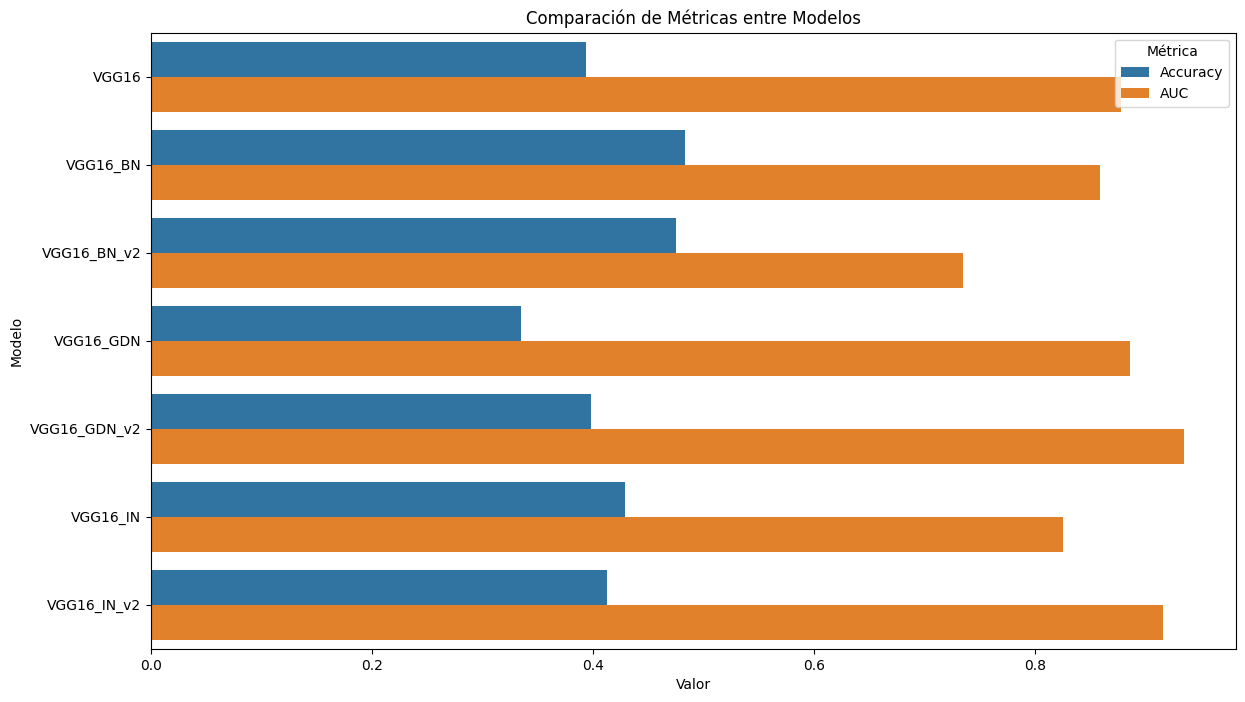

In [13]:
plot_df=results_df_t.copy()
plot_df['Model'] = plot_df.index

# Gráfico de Barras para las Métricas
metrics = ["Model", "Accuracy", "AUC"]
df_melted = plot_df[metrics].melt(id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))
sns.barplot(x='Value', y='Model', hue='Metric', data=df_melted)
plt.title('Comparación de Métricas entre Modelos')
plt.xlabel('Valor')
plt.ylabel('Modelo')
plt.legend(title='Métrica')
# plt.savefig("./results/metrics_cifar100_vgg16.png",dpi=300,format="png")
plt.show()

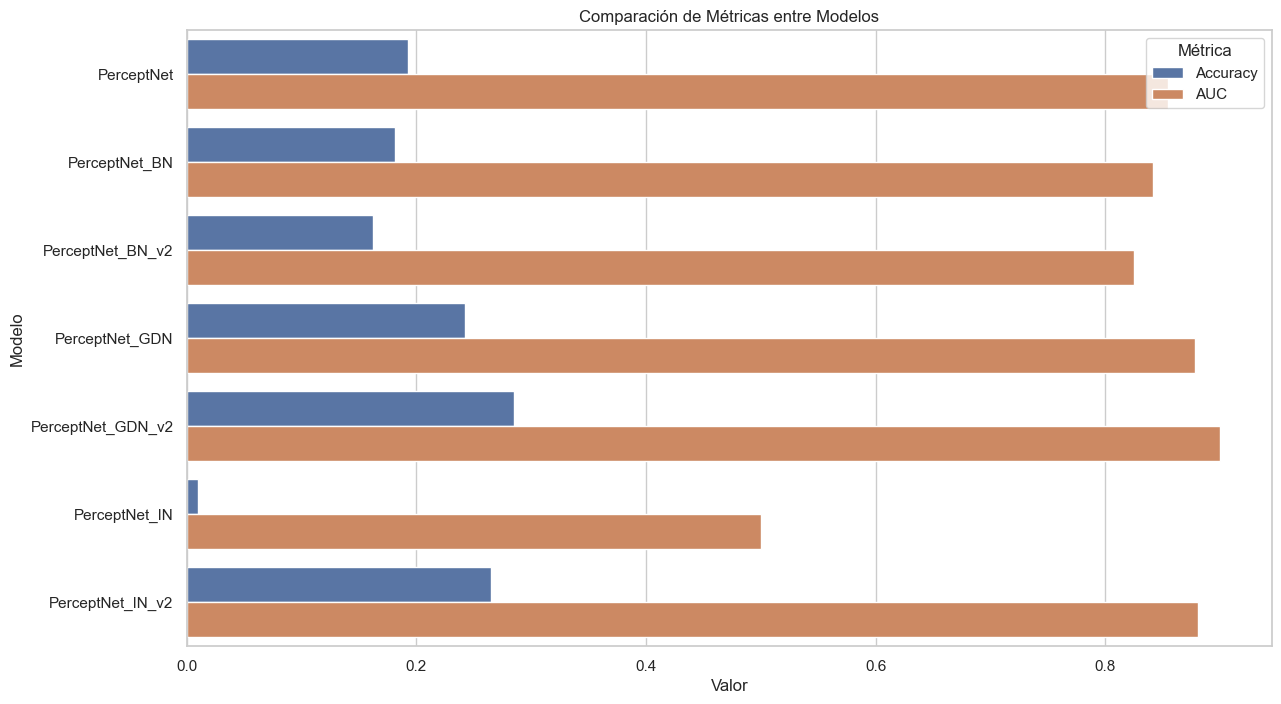

In [120]:
plot_df2=results_df_t2.copy()
plot_df2['Model'] = plot_df2.index

# Gráfico de Barras para las Métricas
metrics = ["Model", "Accuracy", "AUC"]
df_melted = plot_df2[metrics].melt(id_vars='Model', value_vars=metrics, var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 8))
sns.barplot(x='Value', y='Model', hue='Metric', data=df_melted)
plt.title('Comparación de Métricas entre Modelos')
plt.xlabel('Valor')
plt.ylabel('Modelo')
plt.legend(title='Métrica')
plt.savefig("./results/metrics_cifar100_perceptnet.png",dpi=300,format="png")
plt.show()

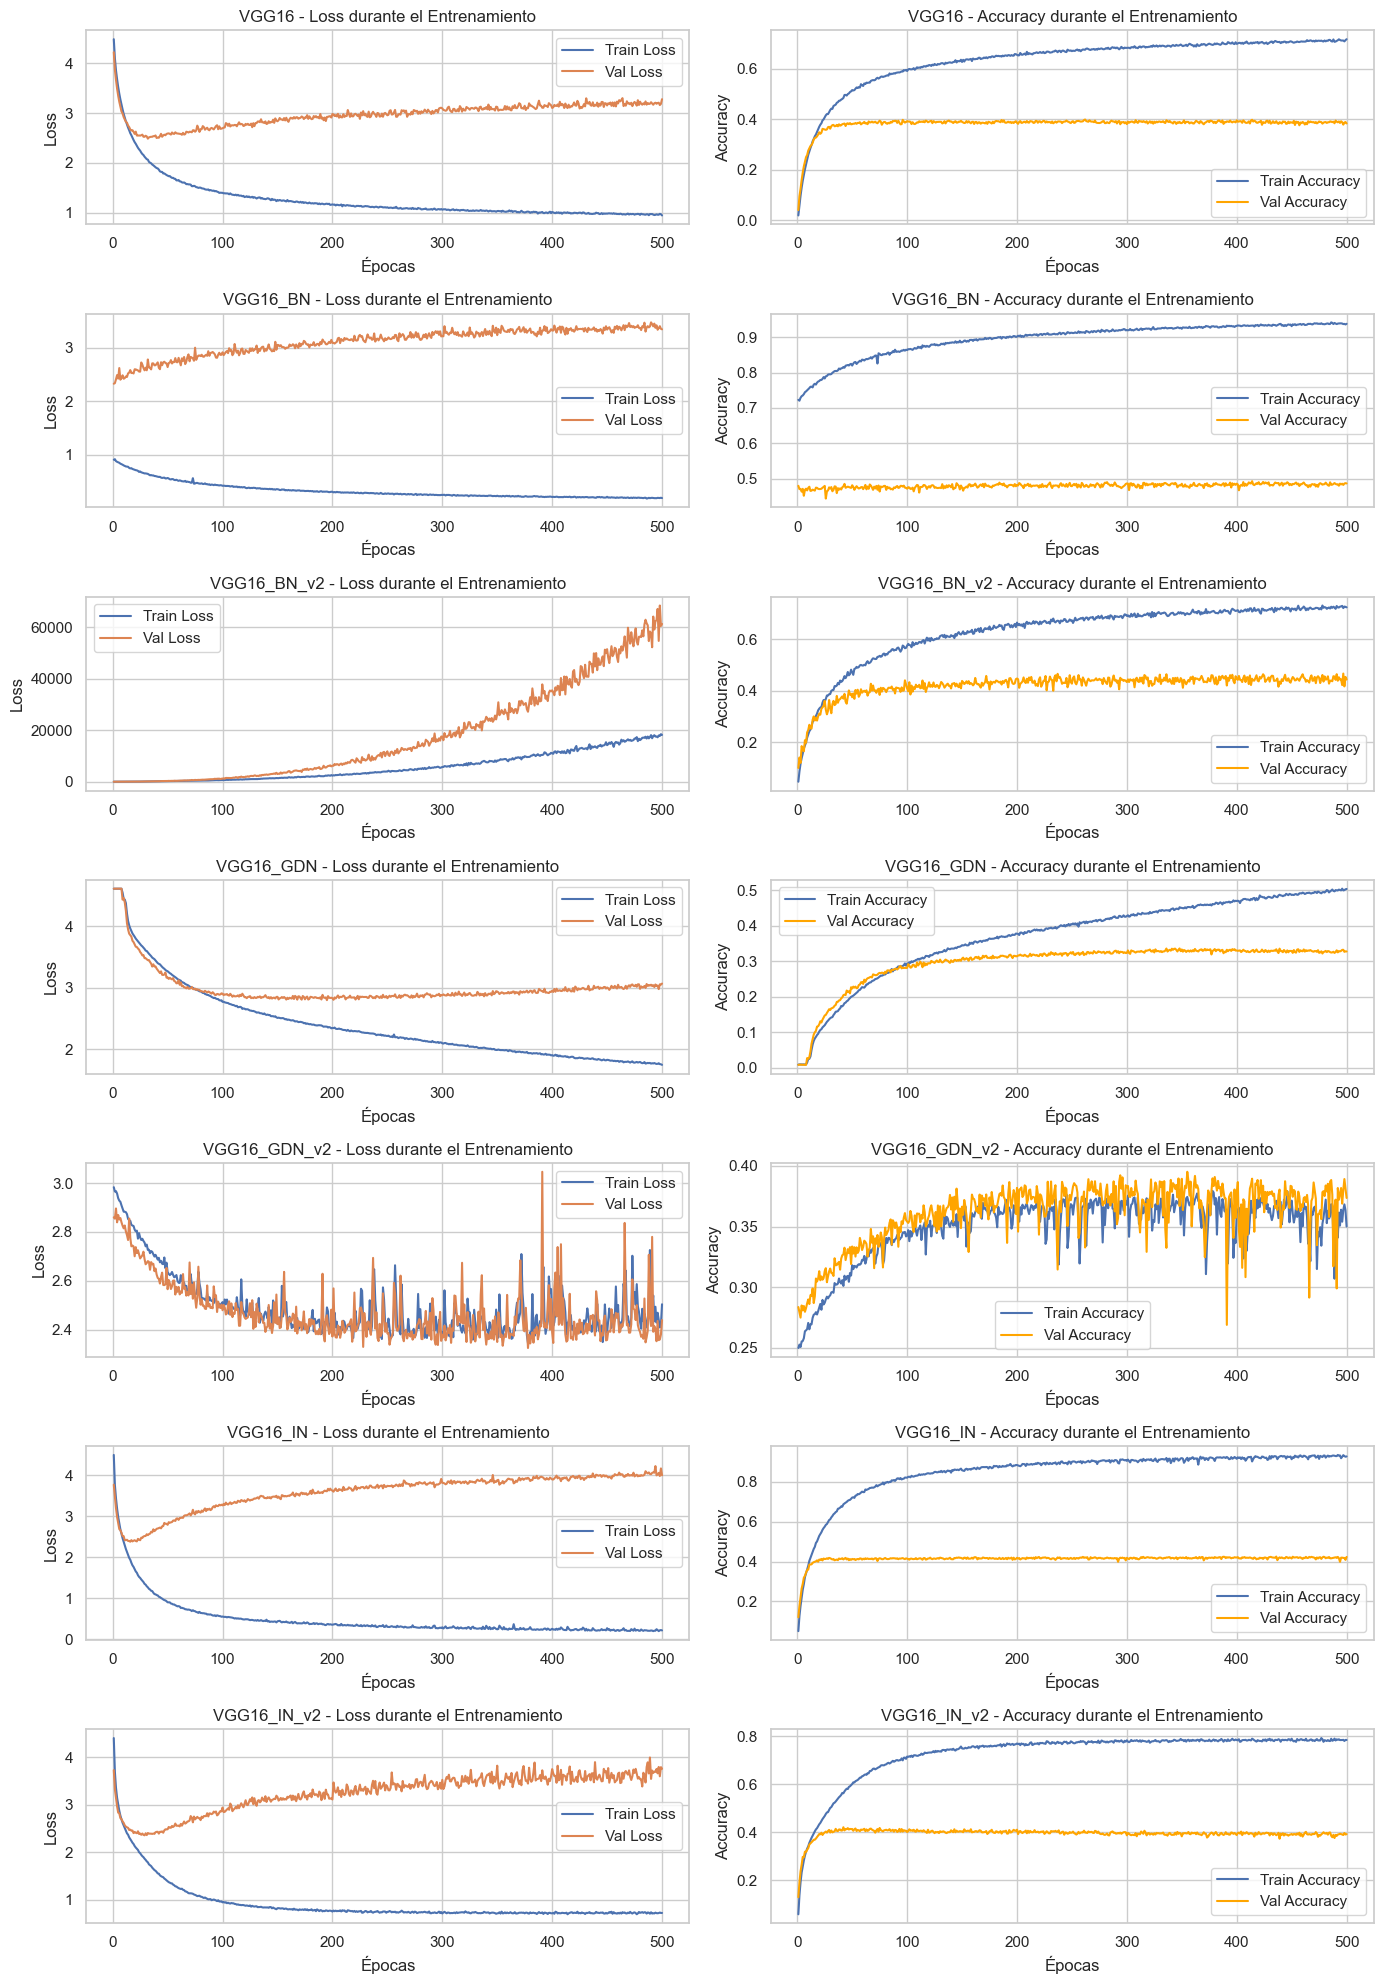

In [148]:
models_hist = [
    ('VGG16', vgg16_hist.history),
    ('VGG16_BN', vgg16_bn_hist.history),
    ('VGG16_BN_v2', vgg16_bn_v2_hist.history),
    ('VGG16_GDN', vgg16_gdn_hist.history),
    ('VGG16_GDN_v2', vgg16_gdn_v2_hist.history),
    ('VGG16_IN', vgg16_in_hist.history),
    ('VGG16_IN_v2', vgg16_in_v2_hist.history)
]

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 20))
axes = axes.flatten()

for idx, (model_name, hist) in enumerate(models_hist):
    epochs = range(1, len(hist['loss']) + 1)
    
    df = pd.DataFrame({
        'Epoch': epochs,
        'Train_Loss': hist['loss'],
        'Val_Loss': hist['val_loss'],
        'Train_Accuracy': hist['accuracy'],
        'Val_Accuracy': hist['val_accuracy']
    })
    
    sns.lineplot(x='Epoch', y='Train_Loss', data=df, ax=axes[2*idx], label='Train Loss')
    sns.lineplot(x='Epoch', y='Val_Loss', data=df, ax=axes[2*idx], label='Val Loss')
    axes[2*idx].set_title(f'{model_name} - Loss durante el Entrenamiento')
    axes[2*idx].set_xlabel('Épocas')
    axes[2*idx].set_ylabel('Loss')
    
    sns.lineplot(x='Epoch', y='Train_Accuracy', data=df, ax=axes[2*idx + 1], label='Train Accuracy')
    sns.lineplot(x='Epoch', y='Val_Accuracy', data=df, ax=axes[2*idx + 1], label='Val Accuracy', color='orange')
    axes[2*idx + 1].set_title(f'{model_name} - Accuracy durante el Entrenamiento')
    axes[2*idx + 1].set_xlabel('Épocas')
    axes[2*idx + 1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

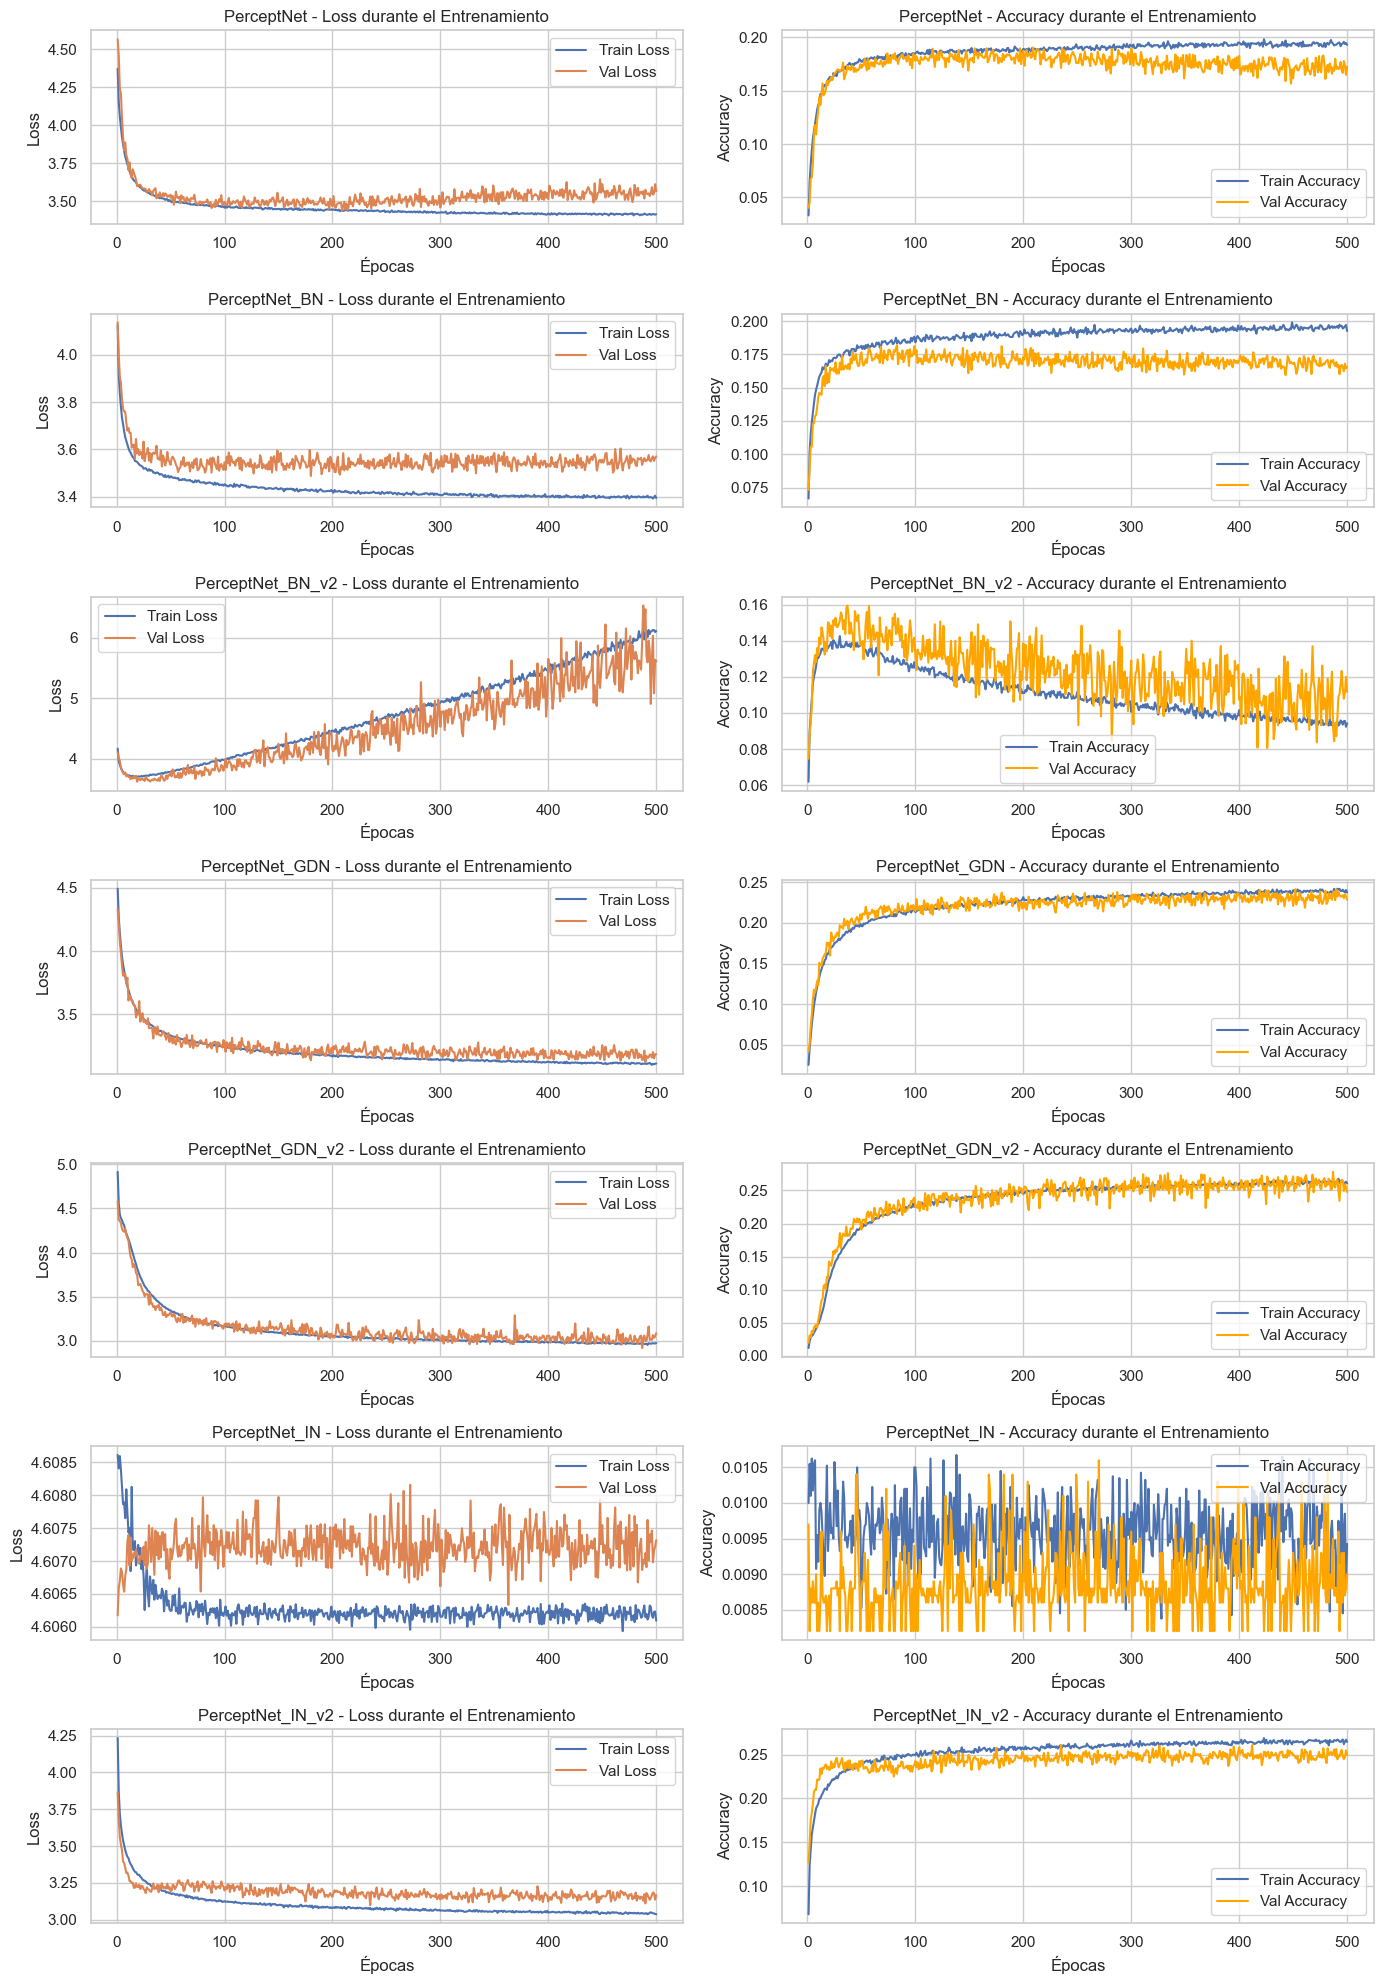

In [146]:
models_hist = [
    ('PerceptNet', hist_perceptnet.history),
    ('PerceptNet_BN', hist_perceptnet_bn.history),
    ('PerceptNet_BN_v2', hist_perceptnet_bn_v2.history),
    ('PerceptNet_GDN', hist_perceptnet_gdn.history),
    ('PerceptNet_GDN_v2', hist_perceptnet_gdn_v2.history),
    ('PerceptNet_IN', hist_perceptnet_in.history),
    ('PerceptNet_IN_v2', hist_perceptnet_in_v2.history)
]

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 20))
axes = axes.flatten()

for idx, (model_name, hist) in enumerate(models_hist):
    epochs = range(1, len(hist['loss']) + 1)
    
    df = pd.DataFrame({
        'Epoch': epochs,
        'Train_Loss': hist['loss'],
        'Val_Loss': hist['val_loss'],
        'Train_Accuracy': hist['accuracy'],
        'Val_Accuracy': hist['val_accuracy']
    })
    
    sns.lineplot(x='Epoch', y='Train_Loss', data=df, ax=axes[2*idx], label='Train Loss')
    sns.lineplot(x='Epoch', y='Val_Loss', data=df, ax=axes[2*idx], label='Val Loss')
    axes[2*idx].set_title(f'{model_name} - Loss durante el Entrenamiento')
    axes[2*idx].set_xlabel('Épocas')
    axes[2*idx].set_ylabel('Loss')
    
    sns.lineplot(x='Epoch', y='Train_Accuracy', data=df, ax=axes[2*idx + 1], label='Train Accuracy')
    sns.lineplot(x='Epoch', y='Val_Accuracy', data=df, ax=axes[2*idx + 1], label='Val Accuracy', color='orange')
    axes[2*idx + 1].set_title(f'{model_name} - Accuracy durante el Entrenamiento')
    axes[2*idx + 1].set_xlabel('Épocas')
    axes[2*idx + 1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()